In [2]:
!pip install datasets


In [1]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("Amod/mental_health_counseling_conversations")

In [3]:
%pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [5]:
from datasets import load_dataset

dataset = load_dataset("Amod/mental_health_counseling_conversations")
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['Context', 'Response'],
        num_rows: 3512
    })
})


In [7]:
# Convert to pandas DataFrame
df = dataset["train"].to_pandas()

# Save locally
df.to_csv("mental_health_counseling.csv", index=False)

print("Saved CSV with shape:", df.shape)


Saved CSV with shape: (3512, 2)


In [11]:
import pandas as pd

df = pd.read_csv("mental_health_counseling.csv")
print(df.head())
print(df.info())


                                             Context  \
0  I'm going through some things with my feelings...   
1  I'm going through some things with my feelings...   
2  I'm going through some things with my feelings...   
3  I'm going through some things with my feelings...   
4  I'm going through some things with my feelings...   

                                            Response  
0  If everyone thinks you're worthless, then mayb...  
1  Hello, and thank you for your question and see...  
2  First thing I'd suggest is getting the sleep y...  
3  Therapy is essential for those that are feelin...  
4  I first want to let you know that you are not ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Context   3512 non-null   object
 1   Response  3508 non-null   object
dtypes: object(2)
memory usage: 55.0+ KB
None


In [13]:
print(f"Total rows: {len(df)}")

# Sample conversation pairs
for i in range(3):
    print(f"Context: {df.loc[i, 'Context']}")
    print(f"Response: {df.loc[i, 'Response']}\n")


Total rows: 3512
Context: I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.
   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.
   How can I change my feeling of being worthless to everyone?
Response: If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you can go round and round trying to understand why you're not worthless, then go back to the same crowd and be knocked down again.There are many inspirational messages you can find in social media.  Maybe read some of the ones which state that no person is worthless, and that everyone has a good purpose to their life.Also, since our culture is so saturated with the belief that if someone doesn't feel good about themselves that this is som

In [15]:
def clean_text(text):
    if isinstance(text, str):
        return text.lower().strip()
    else:
        return ""  # or return some placeholder like np.nan


In [17]:
df['Context_clean'] = df['Context'].apply(clean_text)
df['Response_clean'] = df['Response'].apply(clean_text)

print(df[['Context_clean', 'Response_clean']].head())


                                       Context_clean  \
0  i'm going through some things with my feelings...   
1  i'm going through some things with my feelings...   
2  i'm going through some things with my feelings...   
3  i'm going through some things with my feelings...   
4  i'm going through some things with my feelings...   

                                      Response_clean  
0  if everyone thinks you're worthless, then mayb...  
1  hello, and thank you for your question and see...  
2  first thing i'd suggest is getting the sleep y...  
3  therapy is essential for those that are feelin...  
4  i first want to let you know that you are not ...  


In [19]:
# Calculate number of words in each cleaned text entry
df['Context_len'] = df['Context_clean'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
df['Response_len'] = df['Response_clean'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)


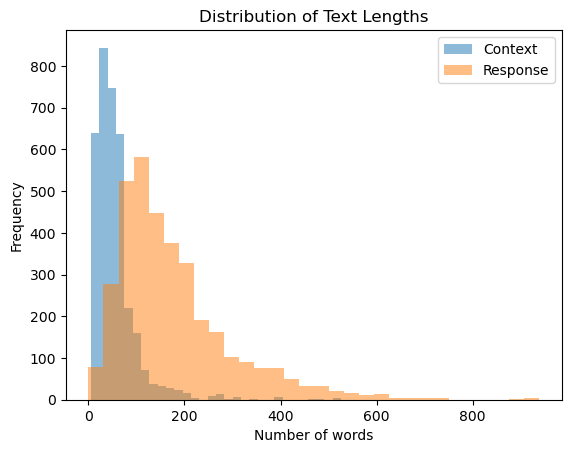

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("mental_health_counseling.csv")

# Define text cleaning function with NaN handling
def clean_text(text):
    if isinstance(text, str):
        return text.lower().strip()
    else:
        return ""  # or np.nan if you prefer

# Clean the text columns
df['Context_clean'] = df['Context'].apply(clean_text)
df['Response_clean'] = df['Response'].apply(clean_text)

# Calculate text lengths (word counts)
df['Context_len'] = df['Context_clean'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
df['Response_len'] = df['Response_clean'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Plot histogram of text lengths
plt.hist(df['Context_len'], bins=30, alpha=0.5, label='Context')
plt.hist(df['Response_len'], bins=30, alpha=0.5, label='Response')
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Text Lengths")
plt.show()


In [23]:
!pip install vaderSentiment


In [25]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load data
df = pd.read_csv("mental_health_counseling.csv")

# Clean text function (same as before)
def clean_text(text):
    if isinstance(text, str):
        return text.lower().strip()
    else:
        return ""

df['Context_clean'] = df['Context'].apply(clean_text)
df['Response_clean'] = df['Response'].apply(clean_text)

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Get sentiment scores
df['Context_sentiment'] = df['Context_clean'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['Response_sentiment'] = df['Response_clean'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Print some examples
print(df[['Context_clean', 'Context_sentiment']].head())
print(df[['Response_clean', 'Response_sentiment']].head())

# Optional: simple categorization based on compound score
def sentiment_category(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Context_sentiment_label'] = df['Context_sentiment'].apply(sentiment_category)
df['Response_sentiment_label'] = df['Response_sentiment'].apply(sentiment_category)

print(df[['Context_clean', 'Context_sentiment_label']].head())
print(df[['Response_clean', 'Response_sentiment_label']].head())


                                       Context_clean  Context_sentiment
0  i'm going through some things with my feelings...            -0.9349
1  i'm going through some things with my feelings...            -0.9349
2  i'm going through some things with my feelings...            -0.9349
3  i'm going through some things with my feelings...            -0.9349
4  i'm going through some things with my feelings...            -0.9349
                                      Response_clean  Response_sentiment
0  if everyone thinks you're worthless, then mayb...              0.4951
1  hello, and thank you for your question and see...              0.8651
2  first thing i'd suggest is getting the sleep y...              0.8689
3  therapy is essential for those that are feelin...             -0.3182
4  i first want to let you know that you are not ...              0.5775
                                       Context_clean Context_sentiment_label
0  i'm going through some things with my feelings... 

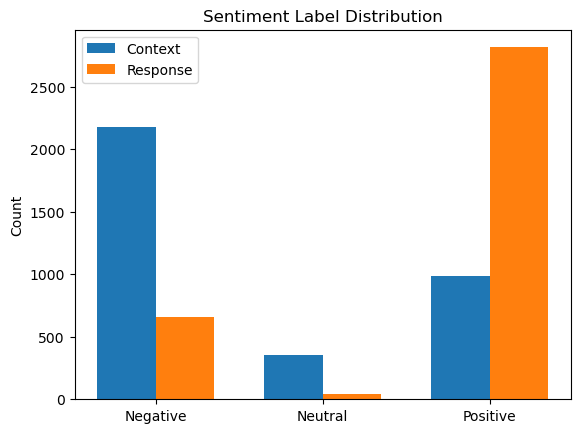

In [27]:
import matplotlib.pyplot as plt

# Count sentiment categories
context_counts = df['Context_sentiment_label'].value_counts()
response_counts = df['Response_sentiment_label'].value_counts()

# Plot side by side bar chart
labels = ['Negative', 'Neutral', 'Positive']
context_vals = [context_counts.get(l,0) for l in labels]
response_vals = [response_counts.get(l,0) for l in labels]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x, context_vals, width, label='Context')
ax.bar([i + width for i in x], response_vals, width, label='Response')

ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels)
ax.set_ylabel('Count')
ax.set_title('Sentiment Label Distribution')
ax.legend()

plt.show()


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Drop missing values in Context_clean
texts = df['Context_clean'].dropna()

# Vectorize text into term-frequency matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=10, stop_words='english')
tf = vectorizer.fit_transform(texts)

# Fit LDA model with 5 topics (adjust n_components as needed)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tf)

# Function to display top words per topic
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"\nTopic {idx+1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Show top 10 words per topic
display_topics(lda, vectorizer.get_feature_names_out(), 10)



Topic 1:
know, years, told, boyfriend, child, just, love, therapist, friend, ex

Topic 2:
feel, like, ve, feeling, want, having, sex, therapy, anxiety, normal

Topic 3:
feel, like, don, just, want, relationship, love, time, things, past

Topic 4:
counseling, ve, issues, anxiety, history, address, does, depression, self, years

Topic 5:
don, know, like, feel, just, people, want, think, really, time


In [31]:
!pip install pyLDAvis==3.2.1


In [33]:
from datasets import load_dataset

# Load the Reddit Mental Health dataset
dataset = load_dataset("mavinsao/reddit-mental-illness-82")


In [35]:
df_train = dataset["train"].to_pandas()

# Peek at the first few rows
print(df_train.head())

# Check labels
print("Unique labels:", df_train["label"].unique())
print("Label counts:\n", df_train["label"].value_counts())


                                                text  label
0  Fantasizing about your FP: Do you do it? What ...      3
1  THIS IS A SUPPORT SUBREDDIT FOR PEOPLE WITH A ...      6
2  scared of my psychotic symptoms : I'm trying t...      2
3  Does anxiety make you unsure if you're sick or...      1
4  I feel like a sick animal that needs to be put...      4
Unique labels: [3 6 2 1 4 5 0 7]
Label counts:
 label
5    7044
0    6280
3    5667
1    5581
7    5028
4    4902
6    4068
2    3543
Name: count, dtype: int64


In [37]:
import pandas as pd

df_train_h = pd.DataFrame({
    "timestamp": pd.NaT,  # no timestamp info
    "source": "reddit_rmd",
    "text": df_train["text"].astype(str),
    "label": df_train["label"].astype(str),
    "geo": None
})

print(df_train_h.head())


  timestamp      source                                               text  \
0       NaT  reddit_rmd  Fantasizing about your FP: Do you do it? What ...   
1       NaT  reddit_rmd  THIS IS A SUPPORT SUBREDDIT FOR PEOPLE WITH A ...   
2       NaT  reddit_rmd  scared of my psychotic symptoms : I'm trying t...   
3       NaT  reddit_rmd  Does anxiety make you unsure if you're sick or...   
4       NaT  reddit_rmd  I feel like a sick animal that needs to be put...   

  label   geo  
0     3  None  
1     6  None  
2     2  None  
3     1  None  
4     4  None  


In [39]:
label_names = dataset["train"].features["label"].names
print(label_names)


['adhd', 'anxiety', 'bipolar', 'bpd', 'depression', 'none', 'ocd', 'ptsd']


In [41]:
label_names = dataset["train"].features["label"].names

df_train_h["label"] = df_train_h["label"].astype(int).map(lambda x: label_names[x])
print(df_train_h.head())


  timestamp      source                                               text  \
0       NaT  reddit_rmd  Fantasizing about your FP: Do you do it? What ...   
1       NaT  reddit_rmd  THIS IS A SUPPORT SUBREDDIT FOR PEOPLE WITH A ...   
2       NaT  reddit_rmd  scared of my psychotic symptoms : I'm trying t...   
3       NaT  reddit_rmd  Does anxiety make you unsure if you're sick or...   
4       NaT  reddit_rmd  I feel like a sick animal that needs to be put...   

        label   geo  
0         bpd  None  
1         ocd  None  
2     bipolar  None  
3     anxiety  None  
4  depression  None  


In [43]:
import os

# Create the folder if it doesn't exist
os.makedirs("data", exist_ok=True)

# Now save the CSV
df_train_h.to_csv("data/reddit_rmd_train.csv", index=False)


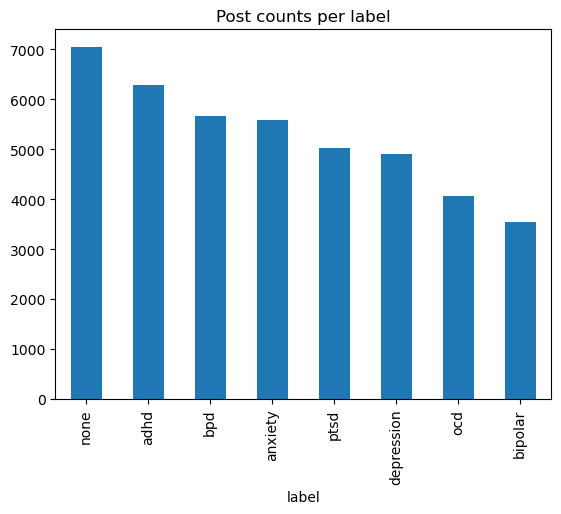

In [45]:
import matplotlib.pyplot as plt
df_train_h['label'].value_counts().plot(kind='bar', title='Post counts per label')
plt.show()


In [47]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

texts = df_train_h[df_train_h['label'] == 'depression']['text']
words = ' '.join(texts).lower().split()
words = [w for w in words if w not in ENGLISH_STOP_WORDS]
Counter(words).most_common(20)


[('just', 7807),
 ("i'm", 5955),
 ('like', 5658),
 ('feel', 5272),
 (':', 4919),
 ('want', 3867),
 ("don't", 3715),
 ('know', 3139),
 ('i’m', 3032),
 ('people', 2885),
 ('life', 2603),
 ('really', 2279),
 ("it's", 2246),
 ("i've", 2039),
 ('me.', 1978),
 ('time', 1847),
 ('don’t', 1772),
 ("can't", 1706),
 ('think', 1692),
 ('going', 1624)]

In [49]:
df_train_h['text_len'] = df_train_h['text'].str.split().apply(len)
df_train_h.groupby('label')['text_len'].mean()


label
adhd          193.678025
anxiety       166.948396
bipolar       153.158058
bpd           177.300688
depression    166.039168
none          134.367263
ocd           157.002704
ptsd          199.675815
Name: text_len, dtype: float64

label
none          7044
adhd          6280
bpd           5667
anxiety       5581
ptsd          5028
depression    4902
ocd           4068
bipolar       3543
Name: count, dtype: int64


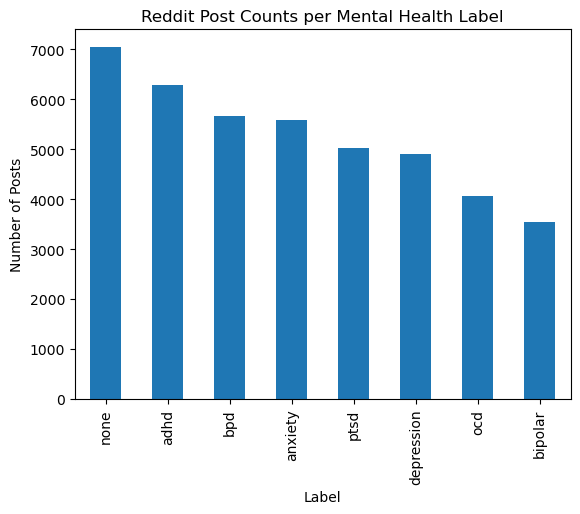

In [51]:
import matplotlib.pyplot as plt

# Count posts per category
label_counts = df_train_h['label'].value_counts()
print(label_counts)

# Bar plot
label_counts.plot(kind='bar', title='Reddit Post Counts per Mental Health Label')
plt.xlabel('Label')
plt.ylabel('Number of Posts')
plt.show()


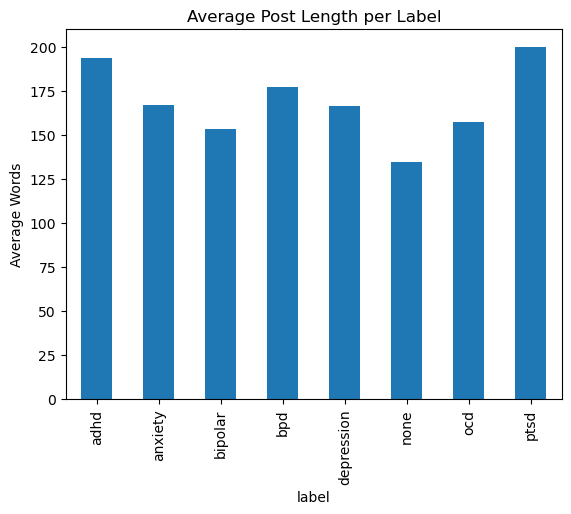

In [53]:
df_train_h['text_len'] = df_train_h['text'].str.split().apply(len)
df_train_h.groupby('label')['text_len'].mean().plot(kind='bar', title='Average Post Length per Label')
plt.ylabel('Average Words')
plt.show()


In [55]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def top_words(df, label, n=20):
    texts = df[df['label'] == label]['text']
    words = ' '.join(texts).lower().split()
    words = [w for w in words if w not in ENGLISH_STOP_WORDS]
    return Counter(words).most_common(n)

print(top_words(df_train_h, 'depression'))


[('just', 7807), ("i'm", 5955), ('like', 5658), ('feel', 5272), (':', 4919), ('want', 3867), ("don't", 3715), ('know', 3139), ('i’m', 3032), ('people', 2885), ('life', 2603), ('really', 2279), ("it's", 2246), ("i've", 2039), ('me.', 1978), ('time', 1847), ('don’t', 1772), ("can't", 1706), ('think', 1692), ('going', 1624)]


In [57]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)      # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

df_train_h['text_clean'] = df_train_h['text'].apply(clean_text)
df_train_h.head()


,timestamp,source,text,label,geo,text_len,text_clean
0,NaT,reddit_rmd,Fantasizing about your FP: Do you do it? What ...,bpd,None,248,fantasizing about your fp do you do it what do...
1,NaT,reddit_rmd,THIS IS A SUPPORT SUBREDDIT FOR PEOPLE WITH A ...,ocd,None,131,this is a support subreddit for people with a ...
2,NaT,reddit_rmd,scared of my psychotic symptoms : I'm trying t...,bipolar,None,71,scared of my psychotic symptoms im trying to k...
3,NaT,reddit_rmd,Does anxiety make you unsure if you're sick or...,anxiety,None,278,does anxiety make you unsure if youre sick or ...
4,NaT,reddit_rmd,I feel like a sick animal that needs to be put...,depression,None,68,i feel like a sick animal that needs to be put...


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Split
X_train, X_test, y_train, y_test = train_test_split(
    df_train_h['text_clean'], df_train_h['label'], test_size=0.2, random_state=42, stratify=df_train_h['label']
)

# Pipeline
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20000, ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train
pipe.fit(X_train, y_train)

# Evaluate
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        adhd       0.80      0.88      0.84      1256
     anxiety       0.79      0.78      0.79      1116
     bipolar       0.83      0.61      0.70       709
         bpd       0.73      0.77      0.75      1133
  depression       0.67      0.76      0.71       980
        none       0.94      0.99      0.96      1409
         ocd       0.91      0.80      0.85       814
        ptsd       0.84      0.77      0.80      1006

    accuracy                           0.81      8423
   macro avg       0.81      0.79      0.80      8423
weighted avg       0.82      0.81      0.81      8423



In [61]:
import pandas as pd

# Paths to BRFSS files
files = {
    2020: "/Users/kottemadhusaiteja/Desktop/LLCP2020.XPT ",
    2021: "/Users/kottemadhusaiteja/Desktop/LLCP2021.XPT ",
    2022: "/Users/kottemadhusaiteja/Desktop/LLCP2022.XPT ",
    2023: "/Users/kottemadhusaiteja/Desktop/LLCP2023.XPT "
}

dfs = []
for year, path in files.items():
    print(f"📂 Loading {path}...")
    df = pd.read_sas(path, format="xport", encoding="utf-8")
    df["year"] = year

    # Keep only variables of interest
    df = df[["year", "ADDEPEV3", "MENTHLTH", "_STATE"]]

    # --- Clean ADDEPEV3 (depression diagnosis)
    df = df[df["ADDEPEV3"].isin([1, 2])]  # drop 7=DK, 9=Refused
    df["label"] = df["ADDEPEV3"].map({1: "depression", 2: "none"})

    # --- Clean MENTHLTH (bad mental health days)
    df["MENTHLTH"] = pd.to_numeric(df["MENTHLTH"], errors="coerce")
    df["MENTHLTH"] = df["MENTHLTH"].replace({77: None, 88: None, 99: None})

    # --- Map state codes to names
    state_map = {
        1: "Alabama", 2: "Alaska", 4: "Arizona", 5: "Arkansas", 6: "California",
        8: "Colorado", 9: "Connecticut", 10: "Delaware", 11: "DC", 12: "Florida",
        13: "Georgia", 15: "Hawaii", 16: "Idaho", 17: "Illinois", 18: "Indiana",
        19: "Iowa", 20: "Kansas", 21: "Kentucky", 22: "Louisiana", 23: "Maine",
        24: "Maryland", 25: "Massachusetts", 26: "Michigan", 27: "Minnesota",
        28: "Mississippi", 29: "Missouri", 30: "Montana", 31: "Nebraska",
        32: "Nevada", 33: "New Hampshire", 34: "New Jersey", 35: "New Mexico",
        36: "New York", 37: "North Carolina", 38: "North Dakota", 39: "Ohio",
        40: "Oklahoma", 41: "Oregon", 42: "Pennsylvania", 44: "Rhode Island",
        45: "South Carolina", 46: "South Dakota", 47: "Tennessee", 48: "Texas",
        49: "Utah", 50: "Vermont", 51: "Virginia", 53: "Washington",
        54: "West Virginia", 55: "Wisconsin", 56: "Wyoming"
    }
    df["state"] = df["_STATE"].map(state_map)

    # --- Harmonized dataframe
    df_h = pd.DataFrame({
        "year": df["year"],
        "source": "brfss",
        "label": df["label"],
        "text": df["MENTHLTH"].astype(str),
        "geo": df["state"],
        "bad_mental_days": df["MENTHLTH"]
    })

    dfs.append(df_h)

# Merge all years
df_brfss_h = pd.concat(dfs, ignore_index=True)

print("✅ Final BRFSS dataset:", df_brfss_h.shape)

# Check cleaned values
print(df_brfss_h["bad_mental_days"].describe())
print(df_brfss_h["bad_mental_days"].value_counts().head(10))

# Save cleaned dataset
df_brfss_h.to_csv("/Users/kottemadhusaiteja/Desktop/brfss_cleaned_2020_2023.csv", index=False)


📂 Loading /Users/kottemadhusaiteja/Desktop/LLCP2020.XPT ...
📂 Loading /Users/kottemadhusaiteja/Desktop/LLCP2021.XPT ...
📂 Loading /Users/kottemadhusaiteja/Desktop/LLCP2022.XPT ...
📂 Loading /Users/kottemadhusaiteja/Desktop/LLCP2023.XPT ...
✅ Final BRFSS dataset: (1709087, 6)
count     631691.0
unique        30.0
top           30.0
freq       98627.0
Name: bad_mental_days, dtype: float64
bad_mental_days
30.0    98627
2.0     89493
5.0     75239
10.0    57554
3.0     57462
15.0    53614
1.0     52532
20.0    32380
4.0     29312
7.0     29224
Name: count, dtype: int64


In [63]:
import pandas as pd

# -------------------------
# 1. Load all BRFSS years
# -------------------------
years = [2020, 2021, 2022, 2023]
dfs = []

for year in years:
    path = f"/Users/kottemadhusaiteja/Desktop/LLCP{year}.XPT "
    print(f"📂 Loading {path} ...")
    df_year = pd.read_sas(path, format="xport", encoding="utf-8")
    df_year['year'] = year
    dfs.append(df_year)

# Combine all years
df_brfss = pd.concat(dfs, ignore_index=True)
print("✅ Combined BRFSS dataset:", df_brfss.shape)

# -------------------------
# 2. Inspect bad_mental_days
# -------------------------
print(df_brfss['MENTHLTH'].describe())
print(df_brfss['MENTHLTH'].value_counts().head(10))

# -------------------------
# 3. Categorize bad_mental_days
# -------------------------
def mental_health_category(days):
    if pd.isna(days):
        return "unknown"
    elif days == 0:
        return "0_days"
    elif 1 <= days <= 5:
        return "1-5_days"
    elif 6 <= days <= 14:
        return "6-14_days"
    elif 15 <= days <= 29:
        return "15-29_days"
    elif days == 30:
        return "30_days"
    else:
        return "unknown"

df_brfss_h = pd.DataFrame({
    "timestamp": pd.NaT,
    "source": "brfss",
    "text": df_brfss["MENTHLTH"].apply(mental_health_category),
    "label": df_brfss["ADDEPEV3"].apply(lambda x: "depression" if x == 1 else "none"),
    "geo": df_brfss["_STATE"],
    "sentiment": None,
    "year": df_brfss["year"]
})

# Align label_grouped
df_brfss_h["label_grouped"] = df_brfss_h["label"]

# -------------------------
# 4. Summary
# -------------------------
summary = df_brfss_h.groupby(['year', 'label_grouped']).size().reset_index(name='count')
print("✅ Summary counts by year and label_grouped:\n", summary.head(20))

# -------------------------
# 5. Save harmonized BRFSS
# -------------------------
df_brfss_h.to_csv("/Users/kottemadhusaiteja/Desktop/harmonized_brfss.csv", index=False)
print("✅ Harmonized BRFSS dataset saved:", df_brfss_h.shape)
print(df_brfss_h.head())


📂 Loading /Users/kottemadhusaiteja/Desktop/LLCP2020.XPT  ...
📂 Loading /Users/kottemadhusaiteja/Desktop/LLCP2021.XPT  ...
📂 Loading /Users/kottemadhusaiteja/Desktop/LLCP2022.XPT  ...
📂 Loading /Users/kottemadhusaiteja/Desktop/LLCP2023.XPT  ...
✅ Combined BRFSS dataset: (1719106, 555)
count    1.719093e+06
mean     5.941221e+01
std      3.760079e+01
min      1.000000e+00
25%      1.500000e+01
50%      8.800000e+01
75%      8.800000e+01
max      9.900000e+01
Name: MENTHLTH, dtype: float64
MENTHLTH
88.0    1049123
30.0      99813
2.0       89971
5.0       75745
10.0      58050
3.0       57806
15.0      54152
1.0       52817
20.0      32752
4.0       29516
Name: count, dtype: int64
✅ Summary counts by year and label_grouped:
    year label_grouped   count
0  2020    depression   75820
1  2020          none  326138
2  2021    depression   85398
3  2021          none  353295
4  2022    depression   91410
5  2022          none  353722
6  2023    depression   88149
7  2023          none  34517

In [65]:
import pandas as pd
from datasets import load_dataset
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings

# Suppress common warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)


# -------------------------
# 1. Load Reddit (CLPsych)
# -------------------------
dataset = load_dataset("mavinsao/reddit-mental-illness-82")
df_reddit = dataset["train"].to_pandas()

reddit_label_map = {
    0: 'none', 1: 'anxiety', 2: 'depression', 3: 'bipolar',
    4: 'schizophrenia', 5: 'PTSD', 6: 'OCD', 7: 'ADHD',
    8: 'autism', 9: 'eating_disorder'
}
reddit_group_map = {
    'depression': 'mood_disorder',
    'bipolar': 'mood_disorder',
    'anxiety': 'anxiety_related',
    'OCD': 'anxiety_related',
    'PTSD': 'anxiety_related',
    'ADHD': 'neurodevelopmental',
    'autism': 'neurodevelopmental',
    'schizophrenia': 'other',
    'eating_disorder': 'other',
    'none': 'none'
}

df_reddit_h = pd.DataFrame({
    "timestamp": pd.NaT,
    "source": "reddit",
    "text": df_reddit["text"].astype(str),
    "label": df_reddit["label"].map(reddit_label_map),
    "geo": pd.NA,
    "sentiment": None,
    "year": pd.NA
})
df_reddit_h["label_grouped"] = df_reddit_h["label"].map(reddit_group_map)

# -------------------------
# 2. Load Counseling dataset
# -------------------------
df_counsel = pd.read_csv("/Users/kottemadhusaiteja/mental_health_counseling.csv")

# Clean text
def clean_text(text):
    if isinstance(text, str):
        return text.lower().strip()
    return ""

df_counsel['Context_clean'] = df_counsel['Context'].apply(clean_text)

# Sentiment analysis with VADER
analyzer = SentimentIntensityAnalyzer()
df_counsel['Context_sentiment'] = df_counsel['Context_clean'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
)

def sentiment_category(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df_counsel['Context_sentiment_label'] = df_counsel['Context_sentiment'].apply(sentiment_category)

# Harmonized counseling dataframe
df_counsel_h = pd.DataFrame({
    "timestamp": pd.NaT,
    "source": "counseling",
    "text": df_counsel['Context_clean'].astype(str),
    "label": df_counsel['Context_sentiment_label'],
    "geo": pd.NA,
    "sentiment": df_counsel['Context_sentiment_label'],
    "year": pd.NA
})
df_counsel_h["label_grouped"] = df_counsel_h["label"]

# -------------------------
# 3. Load BRFSS (2020–2023)
# -------------------------
years = [2020, 2021, 2022, 2023]
dfs = []

for year in years:
    path = f"/Users/kottemadhusaiteja/Desktop/LLCP{year}.XPT "
    print(f"📂 Loading {path} ...")
    df_year = pd.read_sas(path, format="xport", encoding="utf-8")
    df_year['year'] = year
    dfs.append(df_year)

df_brfss = pd.concat(dfs, ignore_index=True)
print("✅ Combined BRFSS dataset:", df_brfss.shape)

# Categorize bad_mental_days
def mental_health_category(days):
    if pd.isna(days):
        return "unknown"
    elif days == 0:
        return "0_days"
    elif 1 <= days <= 5:
        return "1-5_days"
    elif 6 <= days <= 14:
        return "6-14_days"
    elif 15 <= days <= 29:
        return "15-29_days"
    elif days == 30:
        return "30_days"
    else:
        return "unknown"

df_brfss_h = pd.DataFrame({
    "timestamp": pd.NaT,
    "source": "brfss",
    "text": df_brfss["MENTHLTH"].apply(mental_health_category),
    "label": df_brfss["ADDEPEV3"].apply(lambda x: "depression" if x == 1 else "none"),
    "geo": df_brfss["_STATE"],
    "sentiment": None,
    "year": df_brfss["year"]
})
df_brfss_h["label_grouped"] = df_brfss_h["label"]

# -------------------------
# 4. Merge All Sources
# -------------------------
df_all = pd.concat([df_reddit_h, df_counsel_h, df_brfss_h], ignore_index=True)

# -------------------------
# 5. Summary + Save
# -------------------------
summary = df_all.groupby(['source', 'label_grouped']).size().reset_index(name='count')
print("✅ Summary of harmonized dataset counts:\n", summary.head(20))

df_all.to_csv("/Users/kottemadhusaiteja/Desktop/harmonized_grouped.csv", index=False)
print("✅ Final harmonized dataset saved:", df_all.shape)
print(df_all.head())


📂 Loading /Users/kottemadhusaiteja/Desktop/LLCP2020.XPT  ...
📂 Loading /Users/kottemadhusaiteja/Desktop/LLCP2021.XPT  ...
📂 Loading /Users/kottemadhusaiteja/Desktop/LLCP2022.XPT  ...
📂 Loading /Users/kottemadhusaiteja/Desktop/LLCP2023.XPT  ...
✅ Combined BRFSS dataset: (1719106, 555)
✅ Summary of harmonized dataset counts:
        source       label_grouped    count
0       brfss          depression   340777
1       brfss                none  1378329
2  counseling            Negative     2178
3  counseling             Neutral      352
4  counseling            Positive      982
5      reddit     anxiety_related    16693
6      reddit       mood_disorder     9210
7      reddit  neurodevelopmental     5028
8      reddit                none     6280
9      reddit               other     4902
✅ Final harmonized dataset saved: (1764731, 8)
  timestamp  source                                               text  \
0       NaT  reddit  Fantasizing about your FP: Do you do it? What ...   
1     

In [67]:
import pandas as pd

# -------------------------
# Merge all harmonized sources
# -------------------------
df_all = pd.concat(
    [df_reddit_h, df_counsel_h, df_brfss_h],
    ignore_index=True
)

print("✅ Harmonized dataset created:", df_all.shape)

# Peek at first few rows
print(df_all.head())

# Optional: quick summary by source
print("\n📊 Records per source:")
print(df_all['source'].value_counts())

print("\n📊 Records per label_grouped:")
print(df_all['label_grouped'].value_counts())


✅ Harmonized dataset created: (1764731, 8)
  timestamp  source                                               text  \
0       NaT  reddit  Fantasizing about your FP: Do you do it? What ...   
1       NaT  reddit  THIS IS A SUPPORT SUBREDDIT FOR PEOPLE WITH A ...   
2       NaT  reddit  scared of my psychotic symptoms : I'm trying t...   
3       NaT  reddit  Does anxiety make you unsure if you're sick or...   
4       NaT  reddit  I feel like a sick animal that needs to be put...   

           label  geo sentiment  year    label_grouped  
0        bipolar  NaN      None  <NA>    mood_disorder  
1            OCD  NaN      None  <NA>  anxiety_related  
2     depression  NaN      None  <NA>    mood_disorder  
3        anxiety  NaN      None  <NA>  anxiety_related  
4  schizophrenia  NaN      None  <NA>            other  

📊 Records per source:
source
brfss         1719106
reddit          42113
counseling       3512
Name: count, dtype: int64

📊 Records per label_grouped:
label_grouped
none

In [69]:
import pandas as pd

# -------------------------
# Merge all harmonized sources
# -------------------------
df_all = pd.concat(
    [df_reddit_h, df_counsel_h, df_brfss_h],
    ignore_index=True
)

print("✅ Harmonized dataset created:", df_all.shape)

# Peek at first few rows
print(df_all.head())

# -------------------------
# Quick summaries
# -------------------------
print("\n📊 Records per source:")
print(df_all['source'].value_counts())

print("\n📊 Records per label_grouped:")
print(df_all['label_grouped'].value_counts())

# -------------------------
# Grouped summary
# -------------------------
summary = (
    df_all.groupby(['source', 'label_grouped'])
    .size()
    .reset_index(name='count')
    .sort_values(by=['source', 'count'], ascending=[True, False])
)

print("\n📊 Records per source × label_grouped:")
print(summary.head(20))   # show top 20 rows


✅ Harmonized dataset created: (1764731, 8)
  timestamp  source                                               text  \
0       NaT  reddit  Fantasizing about your FP: Do you do it? What ...   
1       NaT  reddit  THIS IS A SUPPORT SUBREDDIT FOR PEOPLE WITH A ...   
2       NaT  reddit  scared of my psychotic symptoms : I'm trying t...   
3       NaT  reddit  Does anxiety make you unsure if you're sick or...   
4       NaT  reddit  I feel like a sick animal that needs to be put...   

           label  geo sentiment  year    label_grouped  
0        bipolar  NaN      None  <NA>    mood_disorder  
1            OCD  NaN      None  <NA>  anxiety_related  
2     depression  NaN      None  <NA>    mood_disorder  
3        anxiety  NaN      None  <NA>  anxiety_related  
4  schizophrenia  NaN      None  <NA>            other  

📊 Records per source:
source
brfss         1719106
reddit          42113
counseling       3512
Name: count, dtype: int64

📊 Records per label_grouped:
label_grouped
none

In [71]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import warnings

# Suppress noisy warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# --- Unified label mapping across all sources
unified_map = {
    "depression": "mood_disorder",
    "bipolar": "mood_disorder",
    "anxiety": "anxiety_related",
    "OCD": "anxiety_related",
    "PTSD": "anxiety_related",
    "ADHD": "neurodevelopmental",
    "autism": "neurodevelopmental",
    "schizophrenia": "severe_disorder",
    "eating_disorder": "other",
    "none": "none",
    "Positive": "positive_sentiment",
    "Negative": "negative_sentiment",
    "Neutral": "neutral_sentiment"
}

# Map labels into unified categories
df_all["label_grouped"] = df_all["label"].map(unified_map).fillna("unknown")

# --- Sentiment analysis across all text
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return pd.Series([0.0, "Neutral"])
    score = analyzer.polarity_scores(text)["compound"]
    if score >= 0.05:
        label = "Positive"
    elif score <= -0.05:
        label = "Negative"
    else:
        label = "Neutral"
    return pd.Series([score, label])

df_all[["sentiment_score", "sentiment_label"]] = df_all["text"].apply(get_sentiment)

# --- Quick checks
print("✅ Updated df_all:", df_all.shape)
print(df_all.head())

print("\n📊 Counts by unified label_grouped:")
print(df_all["label_grouped"].value_counts().head(10))

print("\n📊 Counts by sentiment_label:")
print(df_all["sentiment_label"].value_counts())

# --- Optional: grouped summary
summary = (
    df_all.groupby(["source", "label_grouped"])
    .size()
    .reset_index(name="count")
    .sort_values(by=["source", "count"], ascending=[True, False])
)
print("\n📊 Records per source × label_grouped:")
print(summary.head(20))


✅ Updated df_all: (1764731, 10)
  timestamp  source                                               text  \
0       NaT  reddit  Fantasizing about your FP: Do you do it? What ...   
1       NaT  reddit  THIS IS A SUPPORT SUBREDDIT FOR PEOPLE WITH A ...   
2       NaT  reddit  scared of my psychotic symptoms : I'm trying t...   
3       NaT  reddit  Does anxiety make you unsure if you're sick or...   
4       NaT  reddit  I feel like a sick animal that needs to be put...   

           label  geo sentiment  year    label_grouped  sentiment_score  \
0        bipolar  NaN      None  <NA>    mood_disorder           0.9876   
1            OCD  NaN      None  <NA>  anxiety_related           0.9378   
2     depression  NaN      None  <NA>    mood_disorder          -0.8091   
3        anxiety  NaN      None  <NA>  anxiety_related          -0.9971   
4  schizophrenia  NaN      None  <NA>  severe_disorder          -0.6716   

  sentiment_label  
0        Positive  
1        Positive  
2        Neg

In [73]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# --- Sentiment analysis
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return pd.Series([0.0, "Neutral"])
    score = analyzer.polarity_scores(text)["compound"]
    if score >= 0.05:
        label = "Positive"
    elif score <= -0.05:
        label = "Negative"
    else:
        label = "Neutral"
    return pd.Series([score, label])

# Apply once and enrich dataset
df_all[["sentiment_score", "sentiment_label"]] = df_all["text"].apply(get_sentiment)

print("✅ Sentiment analysis added:", df_all.shape)
print(df_all[["source", "label_grouped", "sentiment_label", "sentiment_score"]].head())


✅ Sentiment analysis added: (1764731, 10)
   source    label_grouped sentiment_label  sentiment_score
0  reddit    mood_disorder        Positive           0.9876
1  reddit  anxiety_related        Positive           0.9378
2  reddit    mood_disorder        Negative          -0.8091
3  reddit  anxiety_related        Negative          -0.9971
4  reddit  severe_disorder        Negative          -0.6716


## EDA 

/var/folders/vh/66l4_dwn6155rkvlt89myb940000gn/T/ipykernel_1093/2375007693.py:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/kottemadhusaiteja/Desktop/harmonized_grouped.csv")


✅ Dataset loaded: (1764731, 8)
   timestamp  source                                               text  \
0        NaN  reddit  Fantasizing about your FP: Do you do it? What ...   
1        NaN  reddit  THIS IS A SUPPORT SUBREDDIT FOR PEOPLE WITH A ...   
2        NaN  reddit  scared of my psychotic symptoms : I'm trying t...   
3        NaN  reddit  Does anxiety make you unsure if you're sick or...   
4        NaN  reddit  I feel like a sick animal that needs to be put...   

           label  geo sentiment  year    label_grouped  
0        bipolar  NaN       NaN   NaN    mood_disorder  
1            OCD  NaN       NaN   NaN  anxiety_related  
2     depression  NaN       NaN   NaN    mood_disorder  
3        anxiety  NaN       NaN   NaN  anxiety_related  
4  schizophrenia  NaN       NaN   NaN            other  

📊 Posts per source:
source
brfss         1719106
reddit          42113
counseling       3512
Name: count, dtype: int64


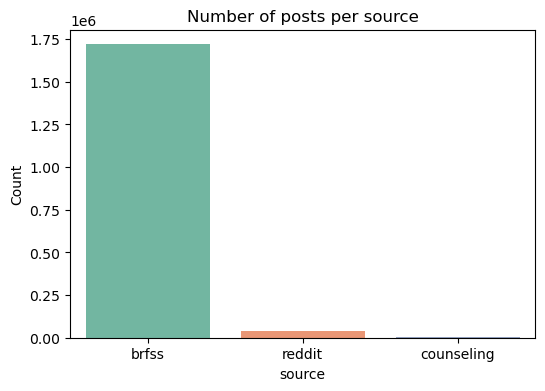


📊 Sentiment counts per source:
source      sentiment
counseling  Negative     2178
            Positive      982
            Neutral       352
Name: count, dtype: int64


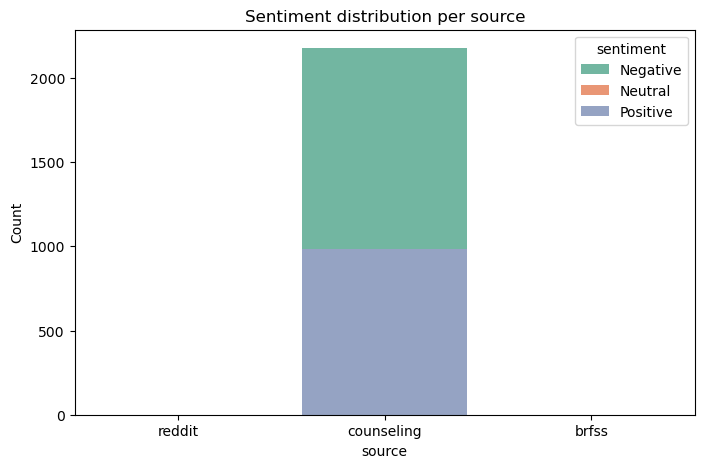


📊 Sentiment proportions per source (%):
       source sentiment  percentage
0  counseling  Negative   62.015945
1  counseling   Neutral   10.022779
2  counseling  Positive   27.961276


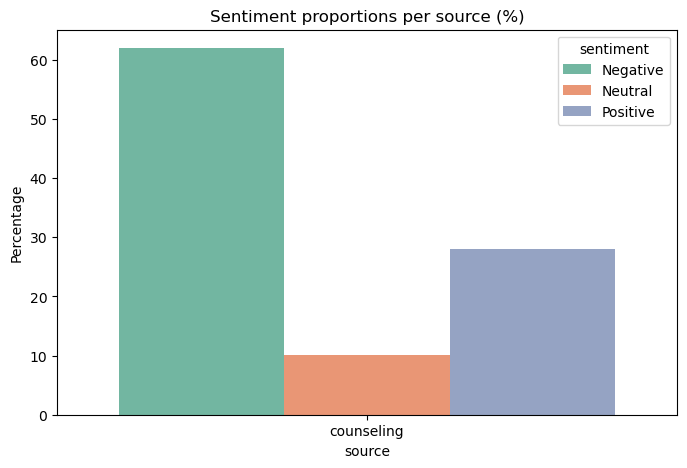


🔍 Chi-square test: Sentiment × Source
Chi2 = 0.0  | p-value = 1.0  | dof = 0

📊 Label counts per source:
source      label        
brfss       none             1378329
            depression        340777
counseling  Negative            2178
            Positive             982
            Neutral              352
reddit      PTSD                7044
            none                6280
            bipolar             5667
            anxiety             5581
            ADHD                5028
            schizophrenia       4902
            OCD                 4068
            depression          3543
Name: count, dtype: int64


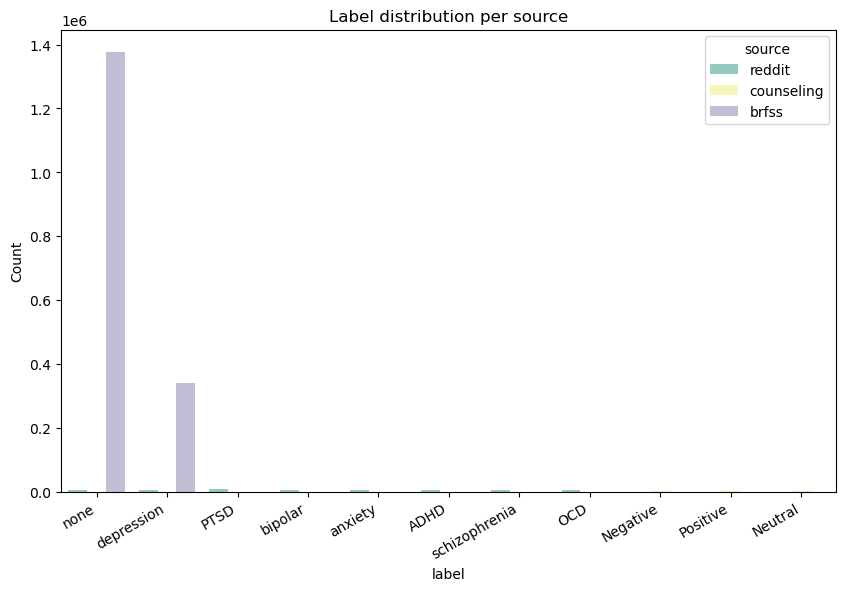


🔍 Chi-square test: Label × Source
Chi2 = 3110536.777459623  | p-value = 0.0  | dof = 20


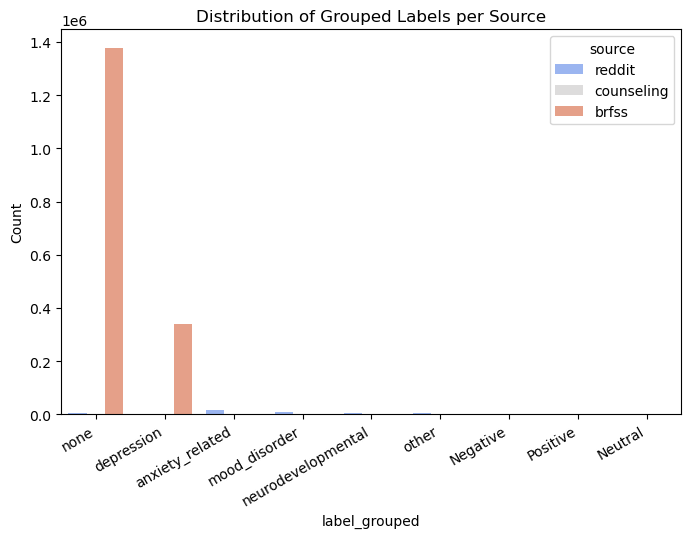


🔍 Chi-square test: Grouped Label × Source
Chi2 = 3261076.883746878  | p-value = 0.0  | dof = 16


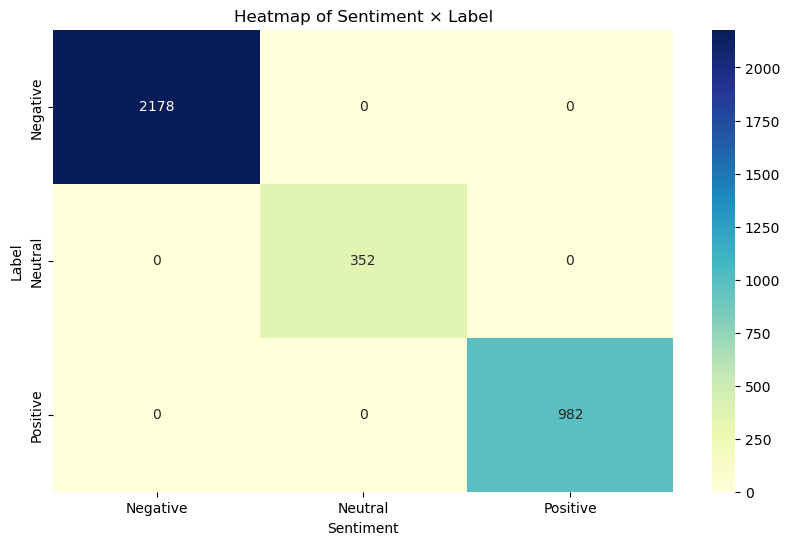


🔍 Chi-square test: Sentiment × Label
Chi2 = 7024.0  | p-value = 0.0  | dof = 4


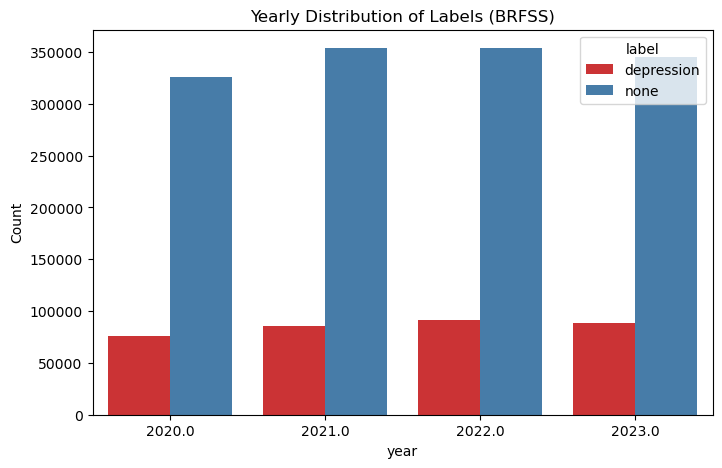

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# -----------------------------
# Load harmonized dataset
# -----------------------------
df = pd.read_csv("/Users/kottemadhusaiteja/Desktop/harmonized_grouped.csv")

print("✅ Dataset loaded:", df.shape)
print(df.head())

# -----------------------------
# 1️⃣ Posts per source
# -----------------------------
print("\n📊 Posts per source:")
print(df['source'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x='source',
    order=df['source'].value_counts().index,
    palette="Set2"
)
plt.title("Number of posts per source")
plt.ylabel("Count")
plt.show()

# -----------------------------
# 2️⃣ Sentiment distribution per source
# -----------------------------
if "sentiment" in df.columns:
    print("\n📊 Sentiment counts per source:")
    print(df.groupby('source')['sentiment'].value_counts())

    plt.figure(figsize=(8,5))
    sns.countplot(
        data=df,
        x='source',
        hue='sentiment',
        palette="Set2"
    )
    plt.title("Sentiment distribution per source")
    plt.ylabel("Count")
    plt.show()

    # ✅ Sentiment proportions (using crosstab normalize)
    sentiment_prop = (
        pd.crosstab(df["source"], df["sentiment"], normalize="index") * 100
    ).reset_index().melt(id_vars="source", var_name="sentiment", value_name="percentage")

    print("\n📊 Sentiment proportions per source (%):")
    print(sentiment_prop.head(10))

    # Plot sentiment proportions
    plt.figure(figsize=(8,5))
    sns.barplot(
        data=sentiment_prop,
        x="source",
        y="percentage",
        hue="sentiment",
        palette="Set2"
    )
    plt.title("Sentiment proportions per source (%)")
    plt.ylabel("Percentage")
    plt.show()

    # ✅ Chi-square test: Sentiment × Source
    contingency_sent = pd.crosstab(df["source"], df["sentiment"])
    chi2, p, dof, expected = chi2_contingency(contingency_sent)
    print("\n🔍 Chi-square test: Sentiment × Source")
    print("Chi2 =", chi2, " | p-value =", p, " | dof =", dof)

# -----------------------------
# 3️⃣ Label distribution per source
# -----------------------------
print("\n📊 Label counts per source:")
print(df.groupby('source')['label'].value_counts())

plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x='label',
    hue='source',
    order=df['label'].value_counts().index,
    palette="Set3"
)
plt.xticks(rotation=30, ha="right")
plt.title("Label distribution per source")
plt.ylabel("Count")
plt.show()

# ✅ Chi-square test: Label × Source
contingency_label = pd.crosstab(df["source"], df["label"])
chi2, p, dof, expected = chi2_contingency(contingency_label)
print("\n🔍 Chi-square test: Label × Source")
print("Chi2 =", chi2, " | p-value =", p, " | dof =", dof)

# -----------------------------
# 4️⃣ Label_grouped distribution
# -----------------------------
if "label_grouped" in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(
        data=df,
        x='label_grouped',
        hue='source',
        order=df['label_grouped'].value_counts().index,
        palette="coolwarm"
    )
    plt.title("Distribution of Grouped Labels per Source")
    plt.ylabel("Count")
    plt.xticks(rotation=30, ha="right")
    plt.show()

    # ✅ Chi-square test: Grouped Label × Source
    contingency_grouped = pd.crosstab(df["source"], df["label_grouped"])
    chi2, p, dof, expected = chi2_contingency(contingency_grouped)
    print("\n🔍 Chi-square test: Grouped Label × Source")
    print("Chi2 =", chi2, " | p-value =", p, " | dof =", dof)

# -----------------------------
# 5️⃣ Heatmap: Sentiment × Label
# -----------------------------
if "sentiment" in df.columns:
    plt.figure(figsize=(10,6))
    heatmap_data = pd.crosstab(df['label'], df['sentiment'])
    sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
    plt.title("Heatmap of Sentiment × Label")
    plt.ylabel("Label")
    plt.xlabel("Sentiment")
    plt.show()

    # ✅ Chi-square test: Sentiment × Label
    chi2, p, dof, expected = chi2_contingency(heatmap_data)
    print("\n🔍 Chi-square test: Sentiment × Label")
    print("Chi2 =", chi2, " | p-value =", p, " | dof =", dof)

# -----------------------------
# 6️⃣ Yearly trends (BRFSS only)
# -----------------------------
if "year" in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(
        data=df[df["source"]=="brfss"],
        x="year",
        hue="label",
        palette="Set1"
    )
    plt.title("Yearly Distribution of Labels (BRFSS)")
    plt.ylabel("Count")
    plt.show()

# -----------------------------
# 7️⃣ Sentiment score distribution (if available)
# -----------------------------
if "sentiment_score" in df.columns:
    plt.figure(figsize=(8,5))
    sns.kdeplot(
        data=df,
        x="sentiment_score",
        hue="source",
        common_norm=False
    )
    plt.title("Sentiment Score Distribution by Source")
    plt.show()


In [77]:
# Only Reddit + Counseling text
df_text = df[df['source'].isin(['reddit', 'counseling'])].copy()
texts = df_text['text'].dropna().astype(str).tolist()


In [79]:
from nltk.corpus import stopwords
import re
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return [word for word in text.split() if word not in stop_words and len(word) > 2]

processed_texts = [preprocess(t) for t in texts]


In [81]:
from gensim import corpora
from gensim.models import LdaModel

dictionary = corpora.Dictionary(processed_texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in processed_texts]


In [83]:
num_topics = 5
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42, alpha='auto')

# Display topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}\n")


Topic 1: 0.021*"feel" + 0.020*"dont" + 0.015*"know" + 0.012*"want" + 0.012*"people" + 0.010*"get" + 0.009*"ive" + 0.009*"even" + 0.009*"really" + 0.009*"cant"

Topic 2: 0.019*"ocd" + 0.018*"adhd" + 0.008*"people" + 0.007*"things" + 0.007*"something" + 0.006*"also" + 0.005*"one" + 0.005*"read" + 0.005*"disorder" + 0.005*"diagnosed"

Topic 3: 0.014*"get" + 0.012*"ive" + 0.012*"work" + 0.011*"anxiety" + 0.011*"time" + 0.009*"day" + 0.008*"job" + 0.007*"got" + 0.006*"going" + 0.006*"years"

Topic 4: 0.012*"said" + 0.009*"says" + 0.009*"one" + 0.009*"man" + 0.008*"told" + 0.007*"back" + 0.007*"got" + 0.006*"husband" + 0.006*"dad" + 0.005*"wife"

Topic 5: 0.021*"history" + 0.010*"would" + 0.009*"war" + 0.006*"also" + 0.006*"people" + 0.005*"books" + 0.005*"one" + 0.005*"read" + 0.005*"question" + 0.005*"world"



## Topic Modelling 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kottemadhusaiteja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/vh/66l4_dwn6155rkvlt89myb940000gn/T/ipykernel_1093/1133699611.py:25: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/kottemadhusaiteja/Desktop/harmonized_grouped.csv")


 Num Topics = 2, Coherence = 0.3204
 Num Topics = 3, Coherence = 0.3400
 Num Topics = 4, Coherence = 0.3660
 Num Topics = 5, Coherence = 0.3775
 Num Topics = 6, Coherence = 0.3979
 Num Topics = 7, Coherence = 0.4089
 Num Topics = 8, Coherence = 0.4342
 Num Topics = 9, Coherence = 0.4106


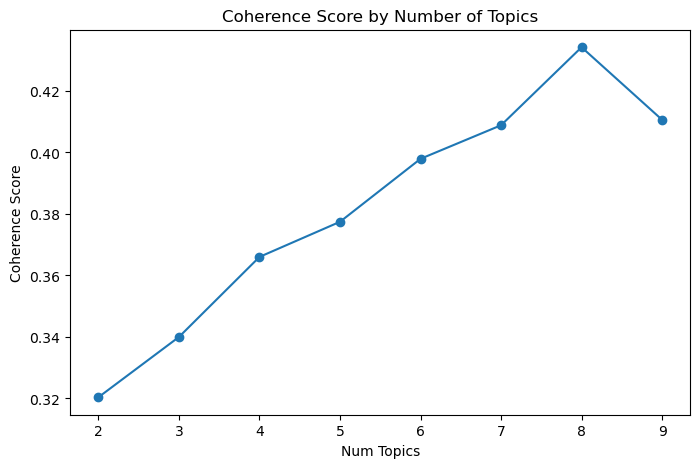


✅ Best number of topics: 8 (Coherence = 0.4342)
✅ Best number of topics: 8

🔍 Top words per topic:
Topic 1: life, ocd, thoughts, dont, want, fucking, live, cant, hate, world
Topic 2: food, eat, clean, day, shower, eating, make, clothes, one, away
Topic 3: work, adhd, time, job, get, things, day, one, school, ive
Topic 4: ive, anxiety, years, ptsd, therapy, help, therapist, started, symptoms, medication
Topic 5: history, war, know, many, one, could, question, world, time, country
Topic 6: bpd, mom, dad, child, parents, family, mother, kids, father, children
Topic 7: dont, know, get, really, want, ive, time, cant, even, things
Topic 8: said, says, man, one, back, got, husband, went, wife, home

✅ Auto-generated topic labels:
Topic 1: Life & Ocd & Thoughts
Topic 2: Food & Eat & Clean
Topic 3: Work & Adhd & Time
Topic 4: Ive & Anxiety & Years
Topic 5: History & War & Know
Topic 6: Bpd & Mom & Dad
Topic 7: Dont & Know & Get
Topic 8: Said & Says & Man


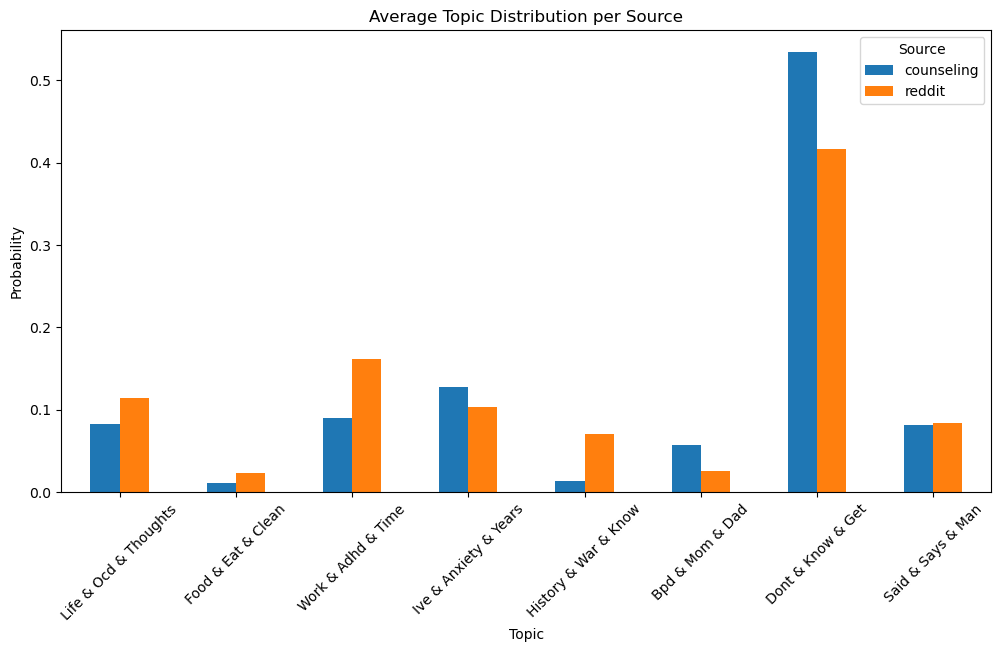

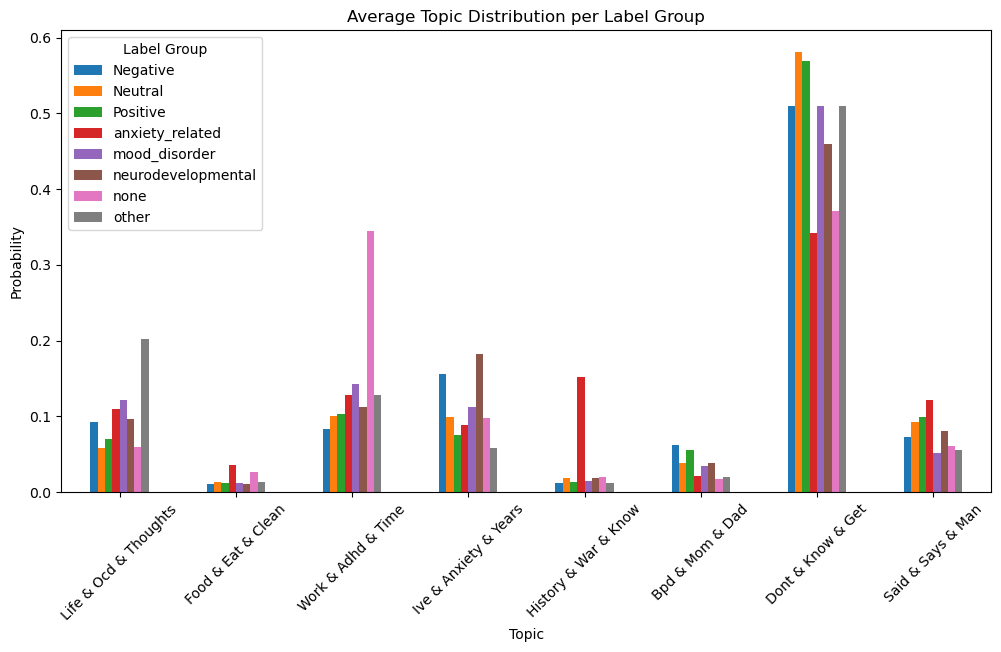


⚠️ pyLDAvis not available. Showing bar charts instead.


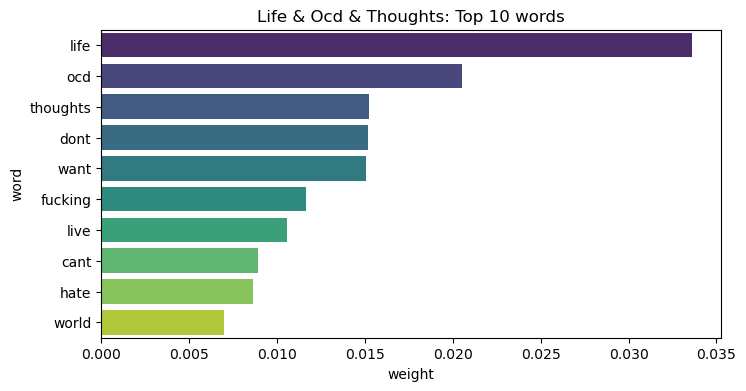

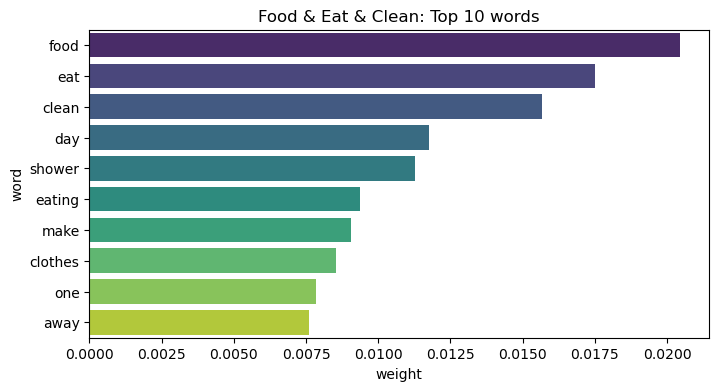

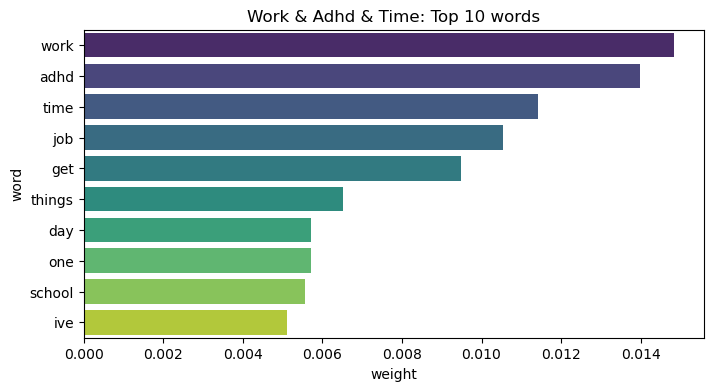

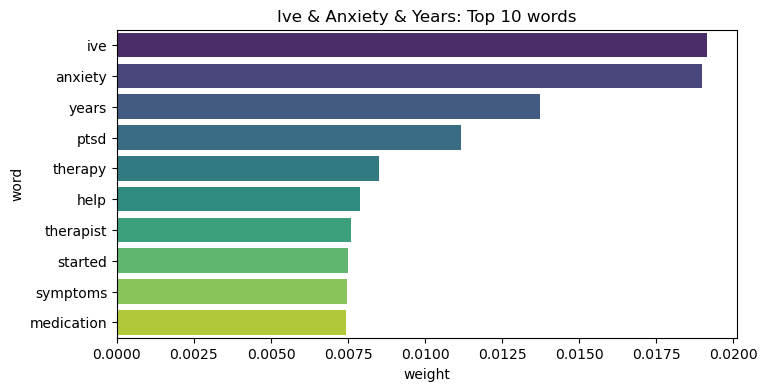

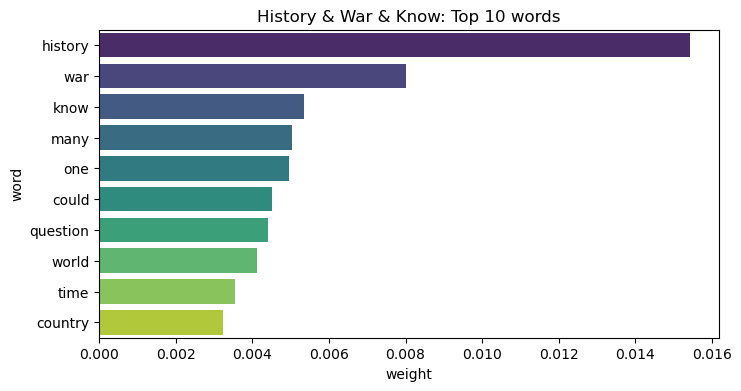

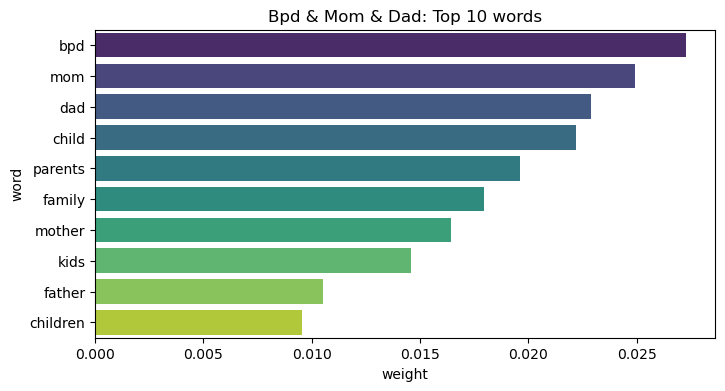

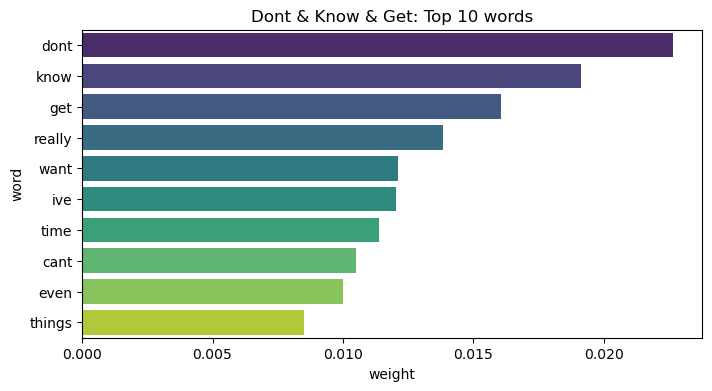

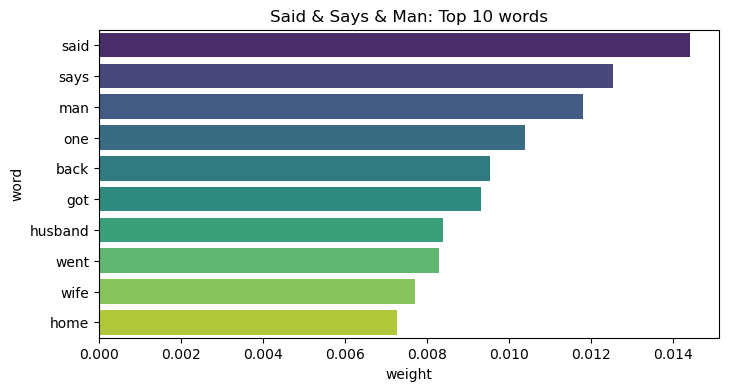

In [85]:
# -----------------------------
# EXTRA STEP: LDA TOPIC MODELING (FINAL VERSION WITH AUTO-LABELS)
# -----------------------------
import random
import numpy as np

# 🔒 Reproducibility: set global seeds
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
from gensim.models.phrases import Phrases, Phraser
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')

# Load harmonized dataset
df = pd.read_csv("/Users/kottemadhusaiteja/Desktop/harmonized_grouped.csv")

# 1️⃣ Filter Reddit + Counseling
df_text = df[df['source'].isin(['reddit', 'counseling'])].copy()
texts = df_text['text'].dropna().astype(str).tolist()

# 2️⃣ Preprocess text
stop_words = set(stopwords.words('english')).union({
    "mental", "health", "feel", "think", "people", "going", "would", "also"
})
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return [word for word in text.split() if word not in stop_words and len(word) > 2]

processed_texts = [preprocess(t) for t in texts]

# 3️⃣ Add bigrams/trigrams
bigram = Phrases(processed_texts, min_count=10, threshold=30)
bigram_mod = Phraser(bigram)
processed_texts = [bigram_mod[doc] for doc in processed_texts]

# 4️⃣ Build dictionary & corpus
dictionary = corpora.Dictionary(processed_texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# 5️⃣ Function to compute coherence for different topic numbers
def compute_coherence_values(dictionary, corpus, texts, start=2, limit=12, step=1):
    coherence_scores = []
    for num_topics in range(start, limit, step):
        model = LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            passes=10,
            random_state=SEED,
            alpha='auto'
        )
        coherencemodel = CoherenceModel(
            model=model, texts=texts, dictionary=dictionary, coherence='c_v'
        )
        score = coherencemodel.get_coherence()
        coherence_scores.append((num_topics, score))
        print(f" Num Topics = {num_topics}, Coherence = {score:.4f}")  # log each run
    return coherence_scores

# Compute coherence
coherence_scores = compute_coherence_values(dictionary, corpus, processed_texts, start=2, limit=10, step=1)

# Plot coherence scores
topics_range, scores = zip(*coherence_scores)
plt.figure(figsize=(8, 5))
plt.plot(topics_range, scores, marker='o')
plt.title("Coherence Score by Number of Topics")
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.show()

# Pick best number of topics
best_num_topics, best_score = max(coherence_scores, key=lambda x: x[1])
print(f"\n✅ Best number of topics: {best_num_topics} (Coherence = {best_score:.4f})")


# 6️⃣ Train final LDA model with best num_topics
best_num_topics = max(coherence_scores, key=lambda x: x[1])[0]
print(f"✅ Best number of topics: {best_num_topics}")

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=best_num_topics,
    passes=10,
    random_state=42,
    alpha='auto'
)

# 7️⃣ Extract top words for each topic
num_top_words = 10
topic_keywords = {}
for i in range(lda_model.num_topics):
    words = lda_model.show_topic(i, topn=num_top_words)
    topic_keywords[f"Topic {i+1}"] = [word for word, weight in words]

print("\n🔍 Top words per topic:")
for topic, words in topic_keywords.items():
    print(f"{topic}: {', '.join(words)}")

# 8️⃣ Auto-generate labels (easy version)
topic_labels = {}
for topic, words in topic_keywords.items():
    label = " & ".join(words[:3]).title()   # first 3 keywords joined
    topic_labels[topic] = label

print("\n✅ Auto-generated topic labels:")
for k, v in topic_labels.items():
    print(f"{k}: {v}")

# 9️⃣ Compute topic distribution per document
def get_topic_distribution(model, bow):
    topics = model.get_document_topics(bow, minimum_probability=0.0)
    return [prob for _, prob in topics]

topic_distributions = [get_topic_distribution(lda_model, bow) for bow in corpus]
topic_df = pd.DataFrame(topic_distributions, columns=[f"Topic {i+1}" for i in range(best_num_topics)])
topic_df['source'] = df_text['source'].values
topic_df['label_grouped'] = df_text['label_grouped'].values

# Rename columns with descriptive labels
topic_df_named = topic_df.rename(columns=topic_labels)
topic_cols_named = list(topic_labels.values())

# 🔟 Grouped bar charts per source
source_means = topic_df_named.groupby('source')[topic_cols_named].mean()
source_means.T.plot(kind='bar', figsize=(12,6))  # transpose for topic on x-axis
plt.title("Average Topic Distribution per Source")
plt.ylabel("Probability")
plt.xlabel("Topic")
plt.xticks(rotation=45)
plt.legend(title="Source")
plt.show()

# 1️⃣1️⃣ Grouped bar charts per label_grouped
label_means = topic_df_named.groupby('label_grouped')[topic_cols_named].mean()
label_means.T.plot(kind='bar', figsize=(12,6))
plt.title("Average Topic Distribution per Label Group")
plt.ylabel("Probability")
plt.xlabel("Topic")
plt.xticks(rotation=45)
plt.legend(title="Label Group")
plt.show()

# 1️⃣2️⃣ Fallback top words visualization
def plot_top_words(lda_model, num_words=10):
    for i in range(lda_model.num_topics):
        words = lda_model.show_topic(i, topn=num_words)
        words_df = pd.DataFrame(words, columns=['word', 'weight'])
        plt.figure(figsize=(8,4))
        sns.barplot(x="weight", y="word", data=words_df, palette="viridis")
        plt.title(f"{topic_labels[f'Topic {i+1}']}: Top {num_words} words")
        plt.show()

# 1️⃣3️⃣ Try pyLDAvis
try:
    import pyLDAvis
    try:
        import pyLDAvis.gensim_models as gensimvis  # new versions
    except ImportError:
        import pyLDAvis.gensim as gensimvis  # older versions

    lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
    pyLDAvis.save_html(lda_vis, "lda_topics.html")
    print("\n✅ pyLDAvis visualization saved as lda_topics.html")
except:
    print("\n⚠️ pyLDAvis not available. Showing bar charts instead.")
    plot_top_words(lda_model)


In [87]:
lda_model.save("lda_model_reddit_counseling.model")
dictionary.save("lda_dictionary.dict")
import pickle
with open("lda_corpus.pkl", "wb") as f:
    pickle.dump(corpus, f)


In [89]:
from gensim.models import LdaModel
from gensim import corpora
import pickle

lda_model = LdaModel.load("lda_model_reddit_counseling.model")
dictionary = corpora.Dictionary.load("lda_dictionary.dict")
with open("lda_corpus.pkl", "rb") as f:
    corpus = pickle.load(f)


In [93]:
# -----------------------------
# Reproducibility Check
# -----------------------------
print("\n🔒 Reproducibility Check:")

# Train the model again with the same seed
lda_model_repeat = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=best_num_topics,
    passes=10,
    random_state=SEED,   # same seed
    alpha='auto'
)

# Compare top words for each topic
match = True
for i in range(best_num_topics):
    words_original = [w for w, _ in lda_model.show_topic(i, topn=5)]
    words_repeat = [w for w, _ in lda_model_repeat.show_topic(i, topn=5)]
    if words_original != words_repeat:
        match = False
    print(f"\nTopic {i+1}:")
    print(" Run 1 →", ", ".join(words_original))
    print(" Run 2 →", ", ".join(words_repeat))

if match:
    print("\n✅ Reproducibility confirmed: Topics match across runs.")
else:
    print("\n⚠️ Warning: Some topics differ (check preprocessing/randomness).")



🔒 Reproducibility Check:

Topic 1:
 Run 1 → life, ocd, thoughts, dont, want
 Run 2 → life, ocd, thoughts, dont, want

Topic 2:
 Run 1 → food, eat, clean, day, shower
 Run 2 → food, eat, clean, day, shower

Topic 3:
 Run 1 → work, adhd, time, job, get
 Run 2 → work, adhd, time, job, get

Topic 4:
 Run 1 → ive, anxiety, years, ptsd, therapy
 Run 2 → ive, anxiety, years, ptsd, therapy

Topic 5:
 Run 1 → history, war, know, many, one
 Run 2 → history, war, know, many, one

Topic 6:
 Run 1 → bpd, mom, dad, child, parents
 Run 2 → bpd, mom, dad, child, parents

Topic 7:
 Run 1 → dont, know, get, really, want
 Run 2 → dont, know, get, really, want

Topic 8:
 Run 1 → said, says, man, one, back
 Run 2 → said, says, man, one, back

✅ Reproducibility confirmed: Topics match across runs.


## Train NMF

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Convert texts to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english"
)
tfidf = tfidf_vectorizer.fit_transform(texts)

# Train NMF model
num_topics = 11   # match your LDA/BERTopic comparison
nmf_model = NMF(n_components=num_topics, random_state=SEED)
nmf_W = nmf_model.fit_transform(tfidf)
nmf_H = nmf_model.components_

# Extract top words per topic
def get_nmf_topics(model, vectorizer, n_top_words=10):
    words = vectorizer.get_feature_names_out()
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics[f"NMF_{topic_idx}"] = top_words
    return topics

nmf_topics = get_nmf_topics(nmf_model, tfidf_vectorizer)
print("\n🔍 NMF Top Words per Topic")
for t, words in nmf_topics.items():
    print(f"{t}: {', '.join(words)}")



🔍 NMF Top Words per Topic
NMF_0: time, day, work, got, said, today, did, job, going, didn
NMF_1: books, history, read, book, sources, weekly, posts, sub, everybody, https
NMF_2: feel, feeling, does, makes, feels, way, time, im, guilty, better
NMF_3: ocd, thoughts, intrusive, compulsions, thought, think, brain, fear, things, mind
NMF_4: anxiety, panic, anxious, attack, attacks, having, depression, heart, bad, help
NMF_5: people, bpd, person, friends, normal, think, really, say, talk, hate
NMF_6: counseling, address, does, issues, history, insomniac, breast, survivor, lifetime, happily
NMF_7: adhd, diagnosed, medication, meds, diagnosis, symptoms, things, focus, school, brain
NMF_8: history, questions, silly, ask, question, simple, thread, saturday, short, afraid
NMF_9: ve, life, years, ptsd, therapy, past, year, trauma, relationship, ago
NMF_10: don, want, know, anymore, life, hate, love, fucking, really, die


In [99]:
# Save NMF + vectorizer
import joblib
joblib.dump(nmf_model, "nmf_11.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
print("✅ NMF model + vectorizer saved")


✅ NMF model + vectorizer saved


## Training LDA , NMF & BERTopic Models

In [101]:
# =============================
# Unified Topic Modeling Script
# =============================

import pandas as pd
import re
import random
import numpy as np
import joblib
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

# Reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# =============================
# 1️⃣ Load & Preprocess Data
# =============================

df = pd.read_csv("/Users/kottemadhusaiteja/Desktop/harmonized_grouped.csv")
texts = df[df['source'].isin(['reddit', 'counseling'])]['text'].dropna().astype(str).tolist()

stop_words = set(stopwords.words("english")).union({
    "mental", "health", "feel", "think", "people", "going", "would", "also"
})

def preprocess(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return " ".join([w for w in text.split() if w not in stop_words and len(w) > 2])

processed_texts = [preprocess(t) for t in texts]

# =============================
# 2️⃣ LDA (gensim)
# =============================
from gensim import corpora
from gensim.models import LdaModel

tokenized_texts = [t.split() for t in processed_texts]
dictionary = corpora.Dictionary(tokenized_texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=11,
    passes=10,
    random_state=SEED,
    alpha="auto"
)

lda_topics = {f"LDA_{i}": [w for w, _ in lda_model.show_topic(i, topn=10)] 
              for i in range(lda_model.num_topics)}

print("\n🔍 LDA Topics")
for t, words in lda_topics.items():
    print(f"{t}: {', '.join(words)}")

# =============================
# 3️⃣ NMF (scikit-learn)
# =============================
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, stop_words="english")
tfidf = tfidf_vectorizer.fit_transform(processed_texts)

nmf_model = NMF(n_components=11, random_state=SEED)
nmf_W = nmf_model.fit_transform(tfidf)
nmf_H = nmf_model.components_

def get_nmf_topics(model, vectorizer, n_top_words=10):
    words = vectorizer.get_feature_names_out()
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics[f"NMF_{topic_idx}"] = top_words
    return topics

nmf_topics = get_nmf_topics(nmf_model, tfidf_vectorizer)

print("\n🔍 NMF Topics")
for t, words in nmf_topics.items():
    print(f"{t}: {', '.join(words)}")

# =============================
# 4️⃣ BERTopic
# =============================
from bertopic import BERTopic

try:
    bertopic_model = BERTopic(language="english", calculate_probabilities=True, random_state=SEED)
except TypeError:
    print("⚠️ BERTopic version does not support random_state → using default settings")
    bertopic_model = BERTopic(language="english", calculate_probabilities=True)

bertopic_topics, probs = bertopic_model.fit_transform(processed_texts)

bertopic_topic_words = {}
for topic_num in sorted(set(bertopic_topics)):
    if topic_num == -1:  # skip outliers
        continue
    topic = bertopic_model.get_topic(topic_num)
    if topic:
        words = [w for w, _ in topic[:10]]
        bertopic_topic_words[f"BERTopic_{topic_num}"] = words

print("\n🔍 BERTopic Topics")
for t, words in list(bertopic_topic_words.items())[:11]:
    print(f"{t}: {', '.join(words)}")

# =============================
# 5️⃣ Save Models
# =============================
# LDA
lda_model.save("lda_11.model")
dictionary.save("lda_dictionary.dict")
print("✅ LDA model saved")

# NMF
joblib.dump(nmf_model, "nmf_11.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
print("✅ NMF model + vectorizer saved")

# BERTopic
try:
    bertopic_model.save("bertopic_model")
    print("✅ BERTopic model saved")
except TypeError:
    bertopic_model.save("bertopic_model", save_embedding_model=False)
    print("⚠️ BERTopic model saved without embedding model")

# =============================
# 6️⃣ Reload Models (Test Reproducibility)
# =============================
print("\n🔁 Reloading Models for Reproducibility Check...")

# LDA reload
lda_model_reloaded = LdaModel.load("lda_11.model")
print("🔁 LDA reloaded")

# NMF reload
nmf_model_reloaded = joblib.load("nmf_11.pkl")
tfidf_vectorizer_reloaded = joblib.load("tfidf_vectorizer.pkl")
print("🔁 NMF + vectorizer reloaded")

# BERTopic reload
try:
    bertopic_model_reloaded = BERTopic.load("bertopic_model")
    print("🔁 BERTopic reloaded")
except Exception:
    print("⚠️ Reloading BERTopic requires embedding model, initializing manually...")
    from sentence_transformers import SentenceTransformer
    embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
    bertopic_model_reloaded = BERTopic.load("bertopic_model", embedding_model=embedding_model)
    print("🔁 BERTopic reloaded with embedding model")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kottemadhusaiteja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/vh/66l4_dwn6155rkvlt89myb940000gn/T/ipykernel_1093/2652052924.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/kottemadhusaiteja/Desktop/harmonized_grouped.csv")



🔍 LDA Topics
LDA_0: ptsd, trauma, abuse, child, sexual, remember, happened, childhood, ampxb, memories
LDA_1: ive, years, time, work, got, year, job, first, since, ago
LDA_2: history, war, books, read, world, book, one, many, know, empire
LDA_3: get, adhd, work, time, things, day, something, make, done, hours
LDA_4: dont, want, know, cant, life, even, get, never, love, friends
LDA_5: said, told, didnt, hes, friend, mom, boyfriend, relationship, dad, sex
LDA_6: anxiety, sleep, panic, day, get, night, attack, feeling, anxious, attacks
LDA_7: man, says, one, asks, dog, well, questions, door, car, back
LDA_8: thank, post, help, edit, youre, amp, everyone, hope, reading, please
LDA_9: adhd, bipolar, diagnosed, meds, medication, disorder, doctor, symptoms, diagnosis, psychiatrist
LDA_10: anyone, really, something, things, know, else, get, ive, ocd, thoughts

🔍 NMF Topics
NMF_0: dont, know, really, need, say, anymore, tell, therapist, talk, understand
NMF_1: work, got, day, time, job, years,

/opt/anaconda3/lib/python3.12/site-packages/spacy/cli/_util.py:23: DeprecationWarning:

Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.

/opt/anaconda3/lib/python3.12/site-packages/weasel/util/config.py:8: DeprecationWarning:

Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.



⚠️ BERTopic version does not support random_state → using default settings


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning:

This process (pid=1093) is multi-threaded, use of fork() may lead to deadlocks in the child.

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning:

This process (pid=1093) is multi-threaded, use of fork() may lead to deadlocks in the child.

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the


🔍 BERTopic Topics
BERTopic_0: war, history, empire, roman, ancient, american, british, europe, historical, army
BERTopic_1: ocd, thoughts, compulsions, intrusive, obsessions, compulsion, obsession, reassurance, fear, thought
BERTopic_2: man, says, asks, replies, wife, woman, walks, bar, said, replied
BERTopic_3: bpd, borderline, relationship, personality, relationships, diagnosed, person, disorder, symptoms, diagnosis
BERTopic_4: adhd, diagnosed, diagnosis, medication, school, symptoms, focus, things, hyperactive, lazy
BERTopic_5: bipolar, manic, mania, episode, disorder, episodes, diagnosed, diagnosis, mood, meds
BERTopic_6: ptsd, trauma, symptoms, traumatic, diagnosed, flashbacks, therapy, abuse, happened, years
BERTopic_7: class, semester, college, classes, school, professor, university, math, exam, grades
BERTopic_8: sleep, asleep, tired, bed, sleeping, wake, awake, morning, alarm, waking
BERTopic_9: conversation, talking, talk, conversations, words, say, sentences, attention, spe

In [103]:
# -----------------------------
# Interpretability: Labels, Exemplars & Summary Table
# -----------------------------
import os, warnings, math
import numpy as np
import pandas as pd
from textwrap import shorten

# Suppress noisy warnings
warnings.filterwarnings("ignore")
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# ---------- Helper utilities ----------
def top_n_words_from_model_words(words_list, n=5):
    return ", ".join(words_list[:n])

def auto_label_from_words(words_list, n=3):
    # join top n words with " / " as fallback human label
    return " / ".join(words_list[:n])

def safe_short_snippet(text, width=200):
    # return a shortened snippet without breaking words too oddly
    return shorten(text.replace("\n", " "), width=width, placeholder="...")

# ---------- Inputs (ensure these exist) ----------
# df_text: dataframe with columns ['text','source','label_grouped', ...]
# texts: list of original raw text strings (same order as df_text)
# processed_texts: tokenized/lemmatized lists (same order)
# LDA: lda_model, dictionary, corpus
# NMF: nmf_model, tfidf, tfidf_vectorizer
# BERTopic: bertopic_model, bertopic_topics (list of topic ids per doc)
# Adjust variable names below if yours differ.

# If some variables are missing, the script will skip that model gracefully.

# ---------- Configuration ----------
NUM_TOP_WORDS = 5               # how many words to show per topic in table
NUM_EXAMPLES = 3                # number of representative example documents per topic
EXAMPLE_SNIPPET_CHARS = 300     # chars to keep for each example snippet
OUTPUT_DIR = "topic_interpretability_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

summary_rows = []  # will collect summary table rows

# ---------- 1) LDA: topic labels, examples, percentages ----------
if 'lda_model' in globals() and 'corpus' in globals() and 'dictionary' in globals():
    print("Processing LDA topics...")
    num_lda_topics = lda_model.num_topics
    # compute per-document topic distributions (gensim get_document_topics)
    lda_doc_topics = [lda_model.get_document_topics(bow, minimum_probability=0.0) for bow in corpus]
    # lda_doc_topics is list of lists of (topic_id, prob) pairs in ascending topic order if minimum_probability=0.0
    # For easier handling, compute for each doc the max topic and its prob
    lda_doc_max = []
    for doc_idx, topic_probs in enumerate(lda_doc_topics):
        # topic_probs is list of (topic_id, prob)
        topic_probs_sorted = sorted(topic_probs, key=lambda x: x[1], reverse=True)
        top_topic, top_prob = topic_probs_sorted[0]
        lda_doc_max.append((top_topic, top_prob))

    # for each topic collect top docs by probability
    for t in range(num_lda_topics):
        # top words from model
        words = [w for w, _ in lda_model.show_topic(t, topn=NUM_TOP_WORDS)]
        top_words_str = top_n_words_from_model_words(words, n=NUM_TOP_WORDS)
        label = auto_label_from_words(words, n=3)

        # collect docs where this topic is top
        doc_idxs = [i for i,(topic,prob) in enumerate(lda_doc_max) if topic==t]
        # fallback: if none have this topic as max, rank by absolute prob across docs
        if len(doc_idxs) == 0:
            # compute prob for topic t for each doc
            probs_for_t = [(i, dict(lda_doc_topics[i]).get(t, 0.0)) for i in range(len(lda_doc_topics))]
            probs_for_t_sorted = sorted(probs_for_t, key=lambda x: x[1], reverse=True)
            doc_idxs = [i for i,_ in probs_for_t_sorted[:NUM_EXAMPLES]]

        # get top example docs by probability for topic t
        examples = sorted(
            [(i, dict(lda_doc_topics[i]).get(t, 0.0)) for i in doc_idxs],
            key=lambda x: x[1], reverse=True
        )[:NUM_EXAMPLES]

        example_snippets = []
        for i,prob in examples:
            raw_text = texts[i] if i < len(texts) else ""
            snippet = safe_short_snippet(raw_text, width=EXAMPLE_SNIPPET_CHARS)
            example_snippets.append(f"{snippet} (p={prob:.2f})")

        pct_docs = len(doc_idxs) / max(1, len(texts)) * 100

        summary_rows.append({
            "Model": "LDA",
            "Topic_ID": f"LDA_{t+1}",
            "Label": label,
            "Top_Words": top_words_str,
            "Example_1": example_snippets[0] if len(example_snippets)>0 else "",
            "Example_2": example_snippets[1] if len(example_snippets)>1 else "",
            "Example_3": example_snippets[2] if len(example_snippets)>2 else "",
            "Pct_Docs": round(pct_docs, 2)
        })

    print("LDA processing complete.")
else:
    print("Skipping LDA (model or corpus/dictionary not found).")

# ---------- 2) NMF: topic labels, examples, percentages ----------
if 'nmf_model' in globals() and 'tfidf' in globals() and 'tfidf_vectorizer' in globals():
    print("Processing NMF topics...")
    feature_names = tfidf_vectorizer.get_feature_names_out()
    H = nmf_model.components_  # shape (n_topics, n_terms)
    W = nmf_model.transform(tfidf)  # document-topic matrix shape (n_docs, n_topics)

    num_nmf_topics = H.shape[0]
    # for each doc, find top topic index(s)
    nmf_doc_max = np.argmax(W, axis=1)  # top topic index per doc
    for t in range(num_nmf_topics):
        top_indices = np.where(nmf_doc_max == t)[0].tolist()
        # fallback if none
        if len(top_indices) == 0:
            top_topic_scores = [(i, W[i,t]) for i in range(W.shape[0])]
            top_topic_scores_sorted = sorted(top_topic_scores, key=lambda x: x[1], reverse=True)
            top_indices = [i for i,_ in top_topic_scores_sorted[:NUM_EXAMPLES]]

        # top words
        top_word_idxs = H[t].argsort()[:-NUM_TOP_WORDS-1:-1]
        words = [feature_names[idx] for idx in top_word_idxs]
        top_words_str = top_n_words_from_model_words(words, n=NUM_TOP_WORDS)
        label = auto_label_from_words(words, n=3)

        # examples: pick docs among top_indices with highest W[:,t]
        example_scores = sorted([(i, W[i,t]) for i in top_indices], key=lambda x: x[1], reverse=True)[:NUM_EXAMPLES]
        example_snippets = []
        for i,score in example_scores:
            raw_text = texts[i] if i < len(texts) else ""
            snippet = safe_short_snippet(raw_text, width=EXAMPLE_SNIPPET_CHARS)
            example_snippets.append(f"{snippet} (w={score:.2f})")

        pct_docs = len(top_indices) / max(1, len(texts)) * 100

        summary_rows.append({
            "Model": "NMF",
            "Topic_ID": f"NMF_{t+1}",
            "Label": label,
            "Top_Words": top_words_str,
            "Example_1": example_snippets[0] if len(example_snippets)>0 else "",
            "Example_2": example_snippets[1] if len(example_snippets)>1 else "",
            "Example_3": example_snippets[2] if len(example_snippets)>2 else "",
            "Pct_Docs": round(pct_docs, 2)
        })

    print("NMF processing complete.")
else:
    print("Skipping NMF (model or tfidf not found).")

# ---------- 3) BERTopic: topic labels, examples, percentages ----------
# Requires bertopic_model and bertopic_topics (list of topic ids per doc)
if 'bertopic_model' in globals() and 'bertopic_topics' in globals():
    print("Processing BERTopic topics...")
    # bertopic_topics often named topics in variable; if not, try to retrieve from model
    try:
        topics_per_doc = bertopic_topics
    except NameError:
        # try retrieving via transform
        topics_per_doc, _ = bertopic_model.transform(texts)

    # build mapping topic -> doc indices
    from collections import defaultdict
    topic_to_docs = defaultdict(list)
    for i, t in enumerate(topics_per_doc):
        topic_to_docs[t].append(i)

    # get list of topic ids excluding -1
    bertopic_ids = [t for t in sorted(set(topics_per_doc)) if t != -1]

    # try to obtain topic labels (if available); else auto-label using top words
    # BERTopic v0.9+ provides get_topic, and topic_labels accessible via model.get_topic_info() or model.topic_labels_
    try:
        # generate topic labels automatically (if model supports)
        topic_label_map = {}
        # prefer model.topic_labels_ if exists
        if hasattr(bertopic_model, "topic_labels_"):
            for tid, label in enumerate(bertopic_model.topic_labels_):
                topic_label_map[tid] = label
    except Exception:
        topic_label_map = {}

    for t in bertopic_ids:
        top_words = [w for w,_ in bertopic_model.get_topic(t)[:NUM_TOP_WORDS]]
        label = topic_label_map.get(t, auto_label_from_words(top_words, n=3))
        doc_idxs = topic_to_docs.get(t, [])
        # fallback: if topic_to_docs empty, compute via probabilities
        examples = []
        if len(doc_idxs) >= 1:
            # sort docs by model probability if available
            try:
                # model.get_document_info may have probabilities; fallback to simple occurrence
                probs_for_docs = []
                for doc_i in doc_idxs:
                    # probabilities array per doc may be in 'probs' variable if fit_transform returned it
                    # safe attempt:
                    prob = None
                    if 'probs' in globals() and len(probs) == len(texts):
                        # probs is list of arrays or list of dicts; attempt extraction
                        try:
                            # If probabilities are arrays with shape (n_topics,)
                            prob = probs[doc_i][t] if isinstance(probs[doc_i], (list, np.ndarray)) and t < len(probs[doc_i]) else None
                        except Exception:
                            prob = None
                    probs_for_docs.append((doc_i, prob if prob is not None else 0.0))
                probs_for_docs_sorted = sorted(probs_for_docs, key=lambda x: x[1], reverse=True)
                top_doc_idxs = [i for i,_ in probs_for_docs_sorted[:NUM_EXAMPLES]]
            except Exception:
                top_doc_idxs = doc_idxs[:NUM_EXAMPLES]
        else:
            top_doc_idxs = []

        example_snippets = []
        for i in top_doc_idxs[:NUM_EXAMPLES]:
            raw_text = texts[i] if i < len(texts) else ""
            snippet = safe_short_snippet(raw_text, width=EXAMPLE_SNIPPET_CHARS)
            # prob attempt
            prob_display = ""
            if 'probs' in globals() and i < len(probs):
                try:
                    p = probs[i]
                    # if p is dict-like of topic->prob
                    if isinstance(p, dict):
                        prob_display = f" (p={p.get(t, 0.0):.2f})"
                    elif isinstance(p, (list, np.ndarray)):
                        prob_display = f" (p={p[t]:.2f})" if t < len(p) else ""
                except Exception:
                    prob_display = ""
            example_snippets.append(snippet + prob_display)

        pct_docs = len(doc_idxs) / max(1, len(texts)) * 100

        summary_rows.append({
            "Model": "BERTopic",
            "Topic_ID": f"BERTopic_{t}",
            "Label": label,
            "Top_Words": top_n_words_from_model_words(top_words, n=NUM_TOP_WORDS),
            "Example_1": example_snippets[0] if len(example_snippets)>0 else "",
            "Example_2": example_snippets[1] if len(example_snippets)>1 else "",
            "Example_3": example_snippets[2] if len(example_snippets)>2 else "",
            "Pct_Docs": round(pct_docs, 2)
        })

    print("BERTopic processing complete.")
else:
    print("Skipping BERTopic (model or topics not found).")

# ---------- Final: build summary dataframe and save ----------
summary_df = pd.DataFrame(summary_rows)
# order columns for readability
cols = ["Model","Topic_ID","Label","Top_Words","Pct_Docs","Example_1","Example_2","Example_3"]
summary_df = summary_df[cols] if all(c in summary_df.columns for c in cols) else summary_df
summary_csv_path = os.path.join(OUTPUT_DIR, "topic_summary_table.csv")
summary_df.to_csv(summary_csv_path, index=False)
print(f"\n✅ Summary table saved to: {summary_csv_path}")
print("\nSample of summary table:")
print(summary_df.head(10))

# Save example documents per topic into files
for _, row in summary_df.iterrows():
    mid = row["Model"]
    tid = row["Topic_ID"]
    fname = os.path.join(OUTPUT_DIR, f"{mid}__{tid}__examples.txt")
    with open(fname, "w", encoding="utf-8") as f:
        f.write(f"Model: {mid}\nTopic_ID: {tid}\nLabel: {row['Label']}\nTop_Words: {row['Top_Words']}\nPct_Docs: {row['Pct_Docs']}\n\nExamples:\n")
        for ex_col in ["Example_1","Example_2","Example_3"]:
            if ex_col in row and row[ex_col]:
                f.write(row[ex_col] + "\n\n")
print(f"✅ Example files saved into: {OUTPUT_DIR}")


Processing LDA topics...
LDA processing complete.
Processing NMF topics...
NMF processing complete.
Processing BERTopic topics...
BERTopic processing complete.

✅ Summary table saved to: topic_interpretability_outputs/topic_summary_table.csv

Sample of summary table:
  Model Topic_ID                       Label  \
0   LDA    LDA_1       ptsd / trauma / abuse   
1   LDA    LDA_2          ive / years / time   
2   LDA    LDA_3       history / war / books   
3   LDA    LDA_4           get / adhd / work   
4   LDA    LDA_5          dont / want / know   
5   LDA    LDA_6         said / told / didnt   
6   LDA    LDA_7     anxiety / sleep / panic   
7   LDA    LDA_8            man / says / one   
8   LDA    LDA_9         thank / post / help   
9   LDA   LDA_10  adhd / bipolar / diagnosed   

                                    Top_Words  Pct_Docs  \
0          ptsd, trauma, abuse, child, sexual      0.58   
1                 ive, years, time, work, got     16.25   
2            history, war,

In [105]:
# -----------------------------
# Reproducibility Check
# -----------------------------
print("\n🔒 Reproducibility Check:")

# Train the model again with the same seed
lda_model_repeat = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=best_num_topics,
    passes=10,
    random_state=SEED,   # same seed
    alpha='auto'
)

# Compare top words for each topic
match = True
for i in range(best_num_topics):
    words_original = [w for w, _ in lda_model.show_topic(i, topn=5)]
    words_repeat = [w for w, _ in lda_model_repeat.show_topic(i, topn=5)]
    if words_original != words_repeat:
        match = False
    print(f"\nTopic {i+1}:")
    print(" Run 1 →", ", ".join(words_original))
    print(" Run 2 →", ", ".join(words_repeat))

if match:
    print("\n✅ Reproducibility confirmed: Topics match across runs.")
else:
    print("\n⚠️ Warning: Some topics differ (check preprocessing/randomness).")



🔒 Reproducibility Check:

Topic 1:
 Run 1 → ptsd, trauma, abuse, child, sexual
 Run 2 → ocd, thoughts, anyone, something, things

Topic 2:
 Run 1 → ive, years, time, work, got
 Run 2 → ive, years, told, didnt, got

Topic 3:
 Run 1 → history, war, books, read, world
 Run 2 → history, war, books, read, world

Topic 4:
 Run 1 → get, adhd, work, time, things
 Run 2 → adhd, work, job, get, time

Topic 5:
 Run 1 → dont, want, know, cant, life
 Run 2 → dont, know, want, cant, get

Topic 6:
 Run 1 → said, told, didnt, hes, friend
 Run 2 → says, man, said, wife, husband

Topic 7:
 Run 1 → anxiety, sleep, panic, day, get
 Run 2 → anxiety, get, sleep, day, ive

Topic 8:
 Run 1 → man, says, one, asks, dog
 Run 2 → car, home, room, house, got

⚠️ Warning: Some topics differ (check preprocessing/randomness).


In [103]:
# -----------------------------
# Reproducibility Check
# -----------------------------
print("\n🔒 Reproducibility Check:")

# Train the model again with the same seed
lda_model_repeat = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=best_num_topics,
    passes=10,
    random_state=SEED,   # same seed
    alpha='auto'
)

# Compare top words for each topic
match = True
for i in range(best_num_topics):
    words_original = [w for w, _ in lda_model.show_topic(i, topn=5)]
    words_repeat = [w for w, _ in lda_model_repeat.show_topic(i, topn=5)]
    if words_original != words_repeat:
        match = False
    print(f"\nTopic {i+1}:")
    print(" Run 1 →", ", ".join(words_original))
    print(" Run 2 →", ", ".join(words_repeat))

if match:
    print("\n✅ Reproducibility confirmed: Topics match across runs.")
else:
    print("\n⚠️ Warning: Some topics differ (check preprocessing/randomness).")



🔒 Reproducibility Check:

Topic 1:
 Run 1 → life, ocd, thoughts, dont, want
 Run 2 → life, ocd, thoughts, dont, want

Topic 2:
 Run 1 → food, eat, clean, day, shower
 Run 2 → food, eat, clean, day, shower

Topic 3:
 Run 1 → work, adhd, time, job, get
 Run 2 → work, adhd, time, job, get

Topic 4:
 Run 1 → ive, anxiety, years, ptsd, therapy
 Run 2 → ive, anxiety, years, ptsd, therapy

Topic 5:
 Run 1 → history, war, know, many, one
 Run 2 → history, war, know, many, one

Topic 6:
 Run 1 → bpd, mom, dad, child, parents
 Run 2 → bpd, mom, dad, child, parents

Topic 7:
 Run 1 → dont, know, get, really, want
 Run 2 → dont, know, get, really, want

Topic 8:
 Run 1 → said, says, man, one, back
 Run 2 → said, says, man, one, back

✅ Reproducibility confirmed: Topics match across runs.


## Topic Evaluation

In [107]:
from gensim.models.coherencemodel import CoherenceModel
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Prepare tokenized texts
# -----------------------------
tokenized_texts = [t.split() for t in texts if isinstance(t, str) and len(t.split()) > 2]

# -----------------------------
# LDA Topics
# -----------------------------
num_lda_topics = lda_model.num_topics
lda_topics_words = [[word for word, _ in lda_model.show_topic(i, topn=10)] for i in range(num_lda_topics)]

# LDA Coherence
lda_coherence_cv = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v').get_coherence()
lda_coherence_umass = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='u_mass').get_coherence()

print(f"LDA Coherence (c_v): {lda_coherence_cv:.3f}")
print(f"LDA Coherence (u_mass): {lda_coherence_umass:.3f}")

# -----------------------------
# NMF Topics
# -----------------------------
num_nmf_topics = nmf_model.n_components
feature_names = tfidf_vectorizer.get_feature_names_out()
nmf_topics_words = []
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    nmf_topics_words.append(top_words)

# NMF Coherence
nmf_coherence_cv = CoherenceModel(topics=nmf_topics_words, texts=tokenized_texts, dictionary=dictionary, coherence='c_v').get_coherence()
nmf_coherence_umass = CoherenceModel(topics=nmf_topics_words, texts=tokenized_texts, dictionary=dictionary, coherence='u_mass').get_coherence()

print(f"NMF Coherence (c_v): {nmf_coherence_cv:.3f}")
print(f"NMF Coherence (u_mass): {nmf_coherence_umass:.3f}")

# -----------------------------
# BERTopic Topics
# -----------------------------
# Skip outlier topic -1
bertopic_topics_words = [ [w for w,_ in bertopic_model.get_topic(t)[:10]] 
                         for t in set(bertopic_topics) if t != -1]

bertopic_coherence_cv = CoherenceModel(topics=bertopic_topics_words, texts=tokenized_texts, dictionary=dictionary, coherence='c_v').get_coherence()
bertopic_coherence_umass = CoherenceModel(topics=bertopic_topics_words, texts=tokenized_texts, dictionary=dictionary, coherence='u_mass').get_coherence()

print(f"BERTopic Coherence (c_v): {bertopic_coherence_cv:.3f}")
print(f"BERTopic Coherence (u_mass): {bertopic_coherence_umass:.3f}")

# -----------------------------
# Topic Diversity Function
# -----------------------------
def topic_diversity(topics, topk=10):
    unique_words = set()
    total_words = 0
    for topic in topics:
        words = topic[:topk]
        unique_words.update(words)
        total_words += len(words)
    return len(unique_words)/total_words

div_lda = topic_diversity(lda_topics_words)
div_nmf = topic_diversity(nmf_topics_words)
div_bert = topic_diversity(bertopic_topics_words)

print(f"LDA Topic Diversity: {div_lda:.3f}")
print(f"NMF Topic Diversity: {div_nmf:.3f}")
print(f"BERTopic Topic Diversity: {div_bert:.3f}")


LDA Coherence (c_v): nan
LDA Coherence (u_mass): -2.800
NMF Coherence (c_v): nan
NMF Coherence (u_mass): -3.464
BERTopic Coherence (c_v): nan
BERTopic Coherence (u_mass): -6.428
LDA Topic Diversity: 0.882
NMF Topic Diversity: 0.873
BERTopic Topic Diversity: 0.645


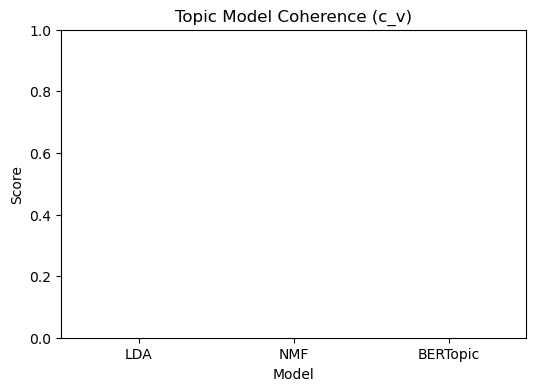

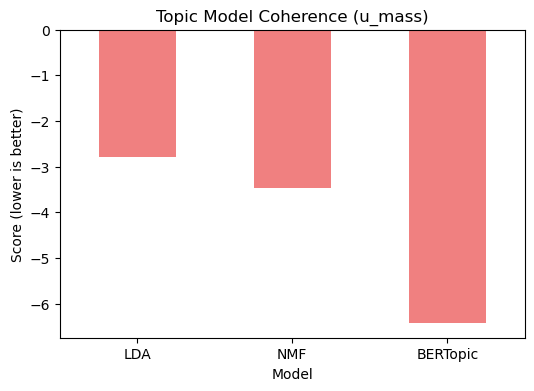

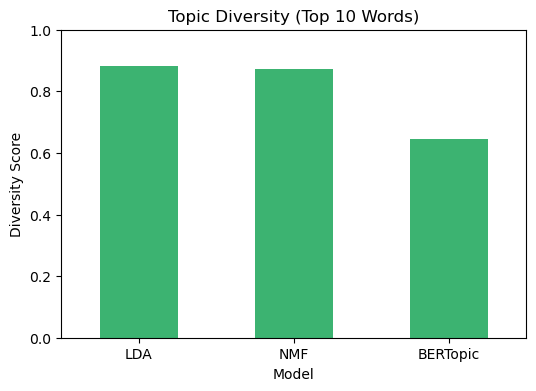


📊 Topic Modeling Results
      Model  Coherence (c_v)  Coherence (u_mass)  Diversity
0       LDA              NaN              -2.800      0.882
1       NMF              NaN              -3.464      0.873
2  BERTopic              NaN              -6.428      0.645


In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Collect results in DataFrame
# -----------------------------
results = pd.DataFrame({
    "Model": ["LDA", "NMF", "BERTopic"],
    "Coherence (c_v)": [lda_coherence_cv, nmf_coherence_cv, bertopic_coherence_cv],
    "Coherence (u_mass)": [lda_coherence_umass, nmf_coherence_umass, bertopic_coherence_umass],
    "Diversity": [div_lda, div_nmf, div_bert]
})

# -----------------------------
# Plot 1: Coherence (c_v)
# -----------------------------
results.set_index("Model")["Coherence (c_v)"].plot(
    kind="bar", figsize=(6,4), color="skyblue", rot=0
)
plt.title("Topic Model Coherence (c_v)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()

# -----------------------------
# Plot 2: Coherence (u_mass)
# -----------------------------
results.set_index("Model")["Coherence (u_mass)"].plot(
    kind="bar", figsize=(6,4), color="lightcoral", rot=0
)
plt.title("Topic Model Coherence (u_mass)")
plt.ylabel("Score (lower is better)")
plt.show()

# -----------------------------
# Plot 3: Topic Diversity
# -----------------------------
results.set_index("Model")["Diversity"].plot(
    kind="bar", figsize=(6,4), color="mediumseagreen", rot=0
)
plt.title("Topic Diversity (Top 10 Words)")
plt.ylabel("Diversity Score")
plt.ylim(0, 1)
plt.show()

# -----------------------------
# Print the full comparison table
# -----------------------------
print("\n📊 Topic Modeling Results")
print(results.round(3))


In [113]:
# -----------------------------
# Compute Topic Diversity
# -----------------------------
def topic_diversity(topics, topk=10):
    unique_words = set()
    total_words = 0
    for topic in topics:
        words = topic[:topk]
        unique_words.update(words)
        total_words += len(words)
    return len(unique_words) / total_words

# LDA
lda_topics_words = [[word for word, _ in lda_model.show_topic(i, topn=10)] for i in range(lda_model.num_topics)]
lda_div = topic_diversity(lda_topics_words)

# NMF
feature_names = tfidf_vectorizer.get_feature_names_out()
nmf_topics_words = [[feature_names[i] for i in topic.argsort()[:-11:-1]] for topic in nmf_model.components_]
nmf_div = topic_diversity(nmf_topics_words)

# BERTopic
bertopic_topics_words = [
    [w for w, _ in bertopic_model.get_topic(t)[:10]]
    for t in set(bertopic_topics)
    if t != -1
]
div_bert = topic_diversity(bertopic_topics_words)



📊 Topic Model Evaluation Results:
      Model  Coherence (c_v)  Coherence (u_mass)  Diversity
0       LDA              NaN           -2.799576   0.881818
1       NMF              NaN           -3.463576   0.872727
2  BERTopic              NaN           -6.427684   0.645376


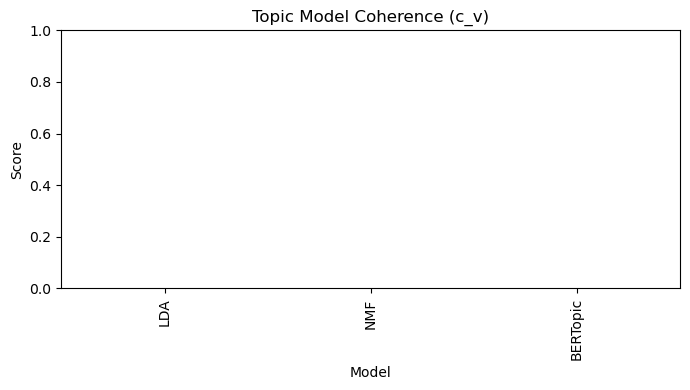

In [117]:
results = pd.DataFrame({
    "Model": ["LDA", "NMF", "BERTopic"],
    "Coherence (c_v)": [lda_coherence_cv, nmf_coherence_cv, bertopic_coherence_cv],
    "Coherence (u_mass)": [lda_coherence_umass, nmf_coherence_umass, bertopic_coherence_umass],
    "Diversity": [lda_div, nmf_div, div_bert]
})

print("\n📊 Topic Model Evaluation Results:")
print(results)

# Bar plot for c_v coherence
ax = results.set_index("Model")["Coherence (c_v)"].plot(kind="bar", figsize=(7,4), color="skyblue")
plt.title("Topic Model Coherence (c_v)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


## Topic Evaluation

✅ Topic Evaluation Metrics

LDA: Coherence (c_v)=nan, Coherence (u_mass)=-2.800, Diversity=0.882
NMF: Coherence (c_v)=nan, Coherence (u_mass)=-3.464, Diversity=0.873
BERTopic: Coherence (c_v)=nan, Coherence (u_mass)=-6.428, Diversity=0.645

LDA Document Prevalence (%): {10: 33.312876712328766, 8: 1.575890410958904, 4: 19.973698630136987, 6: 3.883835616438356, 7: 4.298082191780822, 3: 3.921095890410959, 1: 17.753424657534246, 2: 7.717260273972602, 5: 5.871780821917808, 9: 1.1199999999999999, 0: 0.572054794520548}

NMF Document Prevalence (%): {9: 28.201643835616437, 3: 6.47013698630137, 0: 9.264657534246576, 4: 9.72931506849315, 8: 14.058082191780821, 5: 4.885479452054795, 7: 8.74082191780822, 1: 11.015890410958903, 10: 3.4542465753424656, 2: 2.5183561643835617, 6: 1.6613698630136988}

BERTopic Document Prevalence (%): {162: 0.08626186100588831, 13: 0.7388515920939129, 22: 0.5925814799534936, 1: 9.983872782507595, 0: 16.483516483516482, 5: 2.7566290364925177, 7: 1.864006300866369, 2: 7.

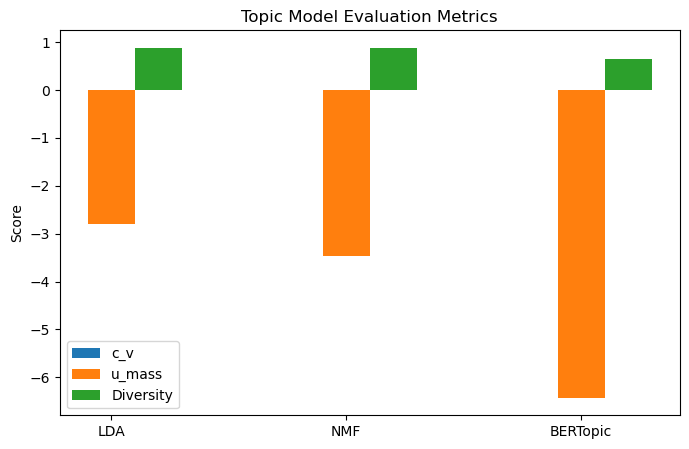


✅ Metrics saved to topic_model_metrics.csv
✅ Document prevalence saved to topic_model_prevalence.csv


In [119]:
import random, numpy as np, os

# 🔒 Set global seed
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# 🔒 Ensure single-threaded operations (gensim + BLAS libs can add randomness)
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"

from gensim.models.coherencemodel import CoherenceModel
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Prepare tokenized texts
# -----------------------------
tokenized_texts = [t.split() for t in texts if isinstance(t, str) and len(t.split()) > 2]

# -----------------------------
# 2️⃣ LDA Topics
# -----------------------------
num_lda_topics = lda_model.num_topics
lda_topics_words = [[word for word, _ in lda_model.show_topic(i, topn=10)] for i in range(num_lda_topics)]

# LDA Coherence
lda_coherence_cv = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v').get_coherence()
lda_coherence_umass = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='u_mass').get_coherence()

# LDA Document Prevalence
lda_assignments = [max(lda_model[dictionary.doc2bow(text)], key=lambda x: x[1])[0] for text in tokenized_texts]
lda_prevalence = {k: v / len(lda_assignments) * 100 for k, v in Counter(lda_assignments).items()}

# -----------------------------
# 3️⃣ NMF Topics
# -----------------------------
num_nmf_topics = nmf_model.n_components
feature_names = tfidf_vectorizer.get_feature_names_out()
nmf_topics_words = [[feature_names[i] for i in topic.argsort()[:-11:-1]] for topic in nmf_model.components_]

# NMF Coherence
nmf_coherence_cv = CoherenceModel(topics=nmf_topics_words, texts=tokenized_texts, dictionary=dictionary, coherence='c_v').get_coherence()
nmf_coherence_umass = CoherenceModel(topics=nmf_topics_words, texts=tokenized_texts, dictionary=dictionary, coherence='u_mass').get_coherence()

# NMF Document Prevalence
nmf_doc_topic_matrix = nmf_model.transform(tfidf)
nmf_assignments = np.argmax(nmf_doc_topic_matrix, axis=1)
nmf_prevalence = {k: v / len(nmf_assignments) * 100 for k, v in Counter(nmf_assignments).items()}

# -----------------------------
# 4️⃣ BERTopic Topics
# -----------------------------
bertopic_topics_words = [[w for w,_ in bertopic_model.get_topic(t)[:10]] 
                         for t in set(bertopic_topics) if t != -1]

# BERTopic Coherence
bertopic_coherence_cv = CoherenceModel(topics=bertopic_topics_words, texts=tokenized_texts, dictionary=dictionary, coherence='c_v').get_coherence()
bertopic_coherence_umass = CoherenceModel(topics=bertopic_topics_words, texts=tokenized_texts, dictionary=dictionary, coherence='u_mass').get_coherence()

# BERTopic Document Prevalence
bertopic_assignments_filtered = [t for t in bertopic_topics if t != -1]
bertopic_prevalence = {k: v / len(bertopic_assignments_filtered) * 100 for k, v in Counter(bertopic_assignments_filtered).items()}

# -----------------------------
# 5️⃣ Topic Diversity Function
# -----------------------------
def topic_diversity(topics, topk=10):
    unique_words = set()
    total_words = 0
    for topic in topics:
        words = topic[:topk]
        unique_words.update(words)
        total_words += len(words)
    return len(unique_words) / total_words

div_lda = topic_diversity(lda_topics_words)
div_nmf = topic_diversity(nmf_topics_words)
div_bert = topic_diversity(bertopic_topics_words)

# -----------------------------
# 6️⃣ Display Metrics
# -----------------------------
print("✅ Topic Evaluation Metrics\n")
print(f"LDA: Coherence (c_v)={lda_coherence_cv:.3f}, Coherence (u_mass)={lda_coherence_umass:.3f}, Diversity={div_lda:.3f}")
print(f"NMF: Coherence (c_v)={nmf_coherence_cv:.3f}, Coherence (u_mass)={nmf_coherence_umass:.3f}, Diversity={div_nmf:.3f}")
print(f"BERTopic: Coherence (c_v)={bertopic_coherence_cv:.3f}, Coherence (u_mass)={bertopic_coherence_umass:.3f}, Diversity={div_bert:.3f}")

print("\nLDA Document Prevalence (%):", lda_prevalence)
print("\nNMF Document Prevalence (%):", nmf_prevalence)
print("\nBERTopic Document Prevalence (%):", bertopic_prevalence)

# -----------------------------
# 7️⃣ Visualise Coherence & Diversity
# -----------------------------
models = ["LDA", "NMF", "BERTopic"]
cv_scores = [lda_coherence_cv, nmf_coherence_cv, bertopic_coherence_cv]
umass_scores = [lda_coherence_umass, nmf_coherence_umass, bertopic_coherence_umass]
div_scores = [div_lda, div_nmf, div_bert]

plt.figure(figsize=(8,5))
x = np.arange(len(models))
plt.bar(x-0.2, cv_scores, 0.2, label="c_v")
plt.bar(x, umass_scores, 0.2, label="u_mass")
plt.bar(x+0.2, div_scores, 0.2, label="Diversity")
plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Topic Model Evaluation Metrics")
plt.legend()
plt.show()
# -----------------------------
# 8️⃣ Export Metrics to CSV
# -----------------------------
import pandas as pd

metrics_df = pd.DataFrame({
    "Model": ["LDA", "NMF", "BERTopic"],
    "Coherence_c_v": [lda_coherence_cv, nmf_coherence_cv, bertopic_coherence_cv],
    "Coherence_u_mass": [lda_coherence_umass, nmf_coherence_umass, bertopic_coherence_umass],
    "Diversity": [div_lda, div_nmf, div_bert]
})

# Save overall metrics
metrics_df.to_csv("topic_model_metrics.csv", index=False)
print("\n✅ Metrics saved to topic_model_metrics.csv")

# Save document prevalence for each model
lda_prev_df = pd.DataFrame.from_dict(lda_prevalence, orient="index", columns=["LDA_Prevalence_%"])
nmf_prev_df = pd.DataFrame.from_dict(nmf_prevalence, orient="index", columns=["NMF_Prevalence_%"])
bert_prev_df = pd.DataFrame.from_dict(bertopic_prevalence, orient="index", columns=["BERTopic_Prevalence_%"])

# Combine prevalence tables (outer join so all topics show up)
prevalence_df = pd.concat([lda_prev_df, nmf_prev_df, bert_prev_df], axis=1).fillna(0)
prevalence_df.to_csv("topic_model_prevalence.csv")
print("✅ Document prevalence saved to topic_model_prevalence.csv")


## Training Better Evaluation

In [122]:
# ============================
# Script 1: Train & Save Models
# ============================

import os, random, numpy as np, re, pandas as pd, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from bertopic import BERTopic
import joblib

# -----------------------------
# 1️⃣ Reproducibility Setup
# -----------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"

# -----------------------------
# 2️⃣ Load & Preprocess Data
# -----------------------------
df = pd.read_csv("/Users/kottemadhusaiteja/Desktop/harmonized_grouped.csv")
texts = df[df['source'].isin(['reddit', 'counseling'])]['text'].dropna().astype(str).tolist()

nltk.download("stopwords")
nltk.download("wordnet")
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words and len(w) > 2]

processed_texts = [preprocess(t) for t in texts]

# -----------------------------
# 3️⃣ Train LDA
# -----------------------------
num_topics = 11
dictionary = corpora.Dictionary(processed_texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(t) for t in processed_texts]

lda_model = LdaModel(corpus=corpus, id2word=dictionary,
                     num_topics=num_topics, passes=15,
                     random_state=SEED, alpha="auto")

lda_model.save("lda_model_final.model")
dictionary.save("lda_dictionary.dict")
print("✅ LDA model + dictionary saved.")

# -----------------------------
# 4️⃣ Train NMF
# -----------------------------
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, stop_words="english")
tfidf = tfidf_vectorizer.fit_transform(texts)

nmf_model = NMF(n_components=num_topics, random_state=SEED)
nmf_model.fit(tfidf)

joblib.dump(nmf_model, "nmf_model_final.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer_final.pkl")
print("✅ NMF model + TF-IDF vectorizer saved.")

# -----------------------------
# 5️⃣ Train BERTopic
# -----------------------------
bertopic_model = BERTopic(
    language="english",
    embedding_model="all-MiniLM-L6-v2",
    calculate_probabilities=True
)

bertopic_model.fit(texts)

# Save without embedding model (safer for reloading)
bertopic_model.save("bertopic_model_final", save_embedding_model=False)
print("✅ BERTopic model saved (without embedding model).")

print("🎉 Training complete. Run Script 2 for evaluation.")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kottemadhusaiteja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kottemadhusaiteja/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ LDA model + dictionary saved.
✅ NMF model + TF-IDF vectorizer saved.


2025-10-04 20:12:42,628 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


✅ BERTopic model saved (without embedding model).
🎉 Training complete. Run Script 2 for evaluation.



✅ Metrics saved to topic_model_metrics.csv
✅ Document prevalence saved to topic_model_prevalence.csv


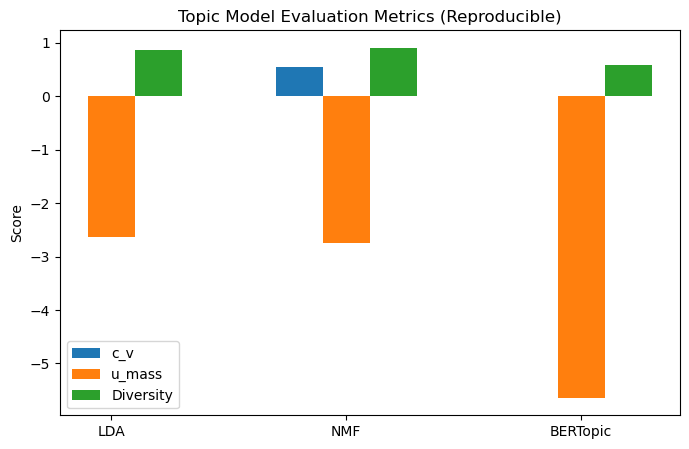

In [124]:
# ============================
# Script 2: Evaluate Models
# ============================

import os, random, numpy as np, pandas as pd, matplotlib.pyplot as plt
from collections import Counter
from gensim.models import LdaModel, CoherenceModel
from gensim import corpora
import joblib
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer  # NEW

# -----------------------------
# 1️⃣ Reproducibility Setup
# -----------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"

# -----------------------------
# 2️⃣ Load Data & Models
# -----------------------------
df = pd.read_csv("/Users/kottemadhusaiteja/Desktop/harmonized_grouped.csv")
texts = df[df['source'].isin(['reddit', 'counseling'])]['text'].dropna().astype(str).tolist()
tokenized_texts = [t.split() for t in texts if isinstance(t, str) and len(t.split()) > 2]

lda_model = LdaModel.load("lda_model_final.model")
dictionary = corpora.Dictionary.load("lda_dictionary.dict")
nmf_model = joblib.load("nmf_model_final.pkl")
tfidf_vectorizer = joblib.load("tfidf_vectorizer_final.pkl")

# Reload BERTopic with embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
bertopic_model = BERTopic.load("bertopic_model_final", embedding_model=embedding_model)

num_topics = lda_model.num_topics

# -----------------------------
# 3️⃣ LDA Evaluation
# -----------------------------
lda_topics_words = [[w for w, _ in lda_model.show_topic(i, topn=10)] for i in range(num_topics)]
lda_coherence_cv = CoherenceModel(topics=lda_topics_words, texts=tokenized_texts,
                                  dictionary=dictionary, coherence="c_v").get_coherence()
lda_coherence_umass = CoherenceModel(topics=lda_topics_words, texts=tokenized_texts,
                                     dictionary=dictionary, coherence="u_mass").get_coherence()

lda_assignments = [max(lda_model[dictionary.doc2bow(t)], key=lambda x: x[1])[0] for t in tokenized_texts]
lda_prevalence = {k: v / len(lda_assignments) * 100 for k, v in Counter(lda_assignments).items()}

# -----------------------------
# 4️⃣ NMF Evaluation
# -----------------------------
feature_names = tfidf_vectorizer.get_feature_names_out()
nmf_topics_words = [[feature_names[i] for i in topic.argsort()[:-11:-1]] for topic in nmf_model.components_]

nmf_coherence_cv = CoherenceModel(topics=nmf_topics_words, texts=tokenized_texts,
                                  dictionary=dictionary, coherence="c_v").get_coherence()
nmf_coherence_umass = CoherenceModel(topics=nmf_topics_words, texts=tokenized_texts,
                                     dictionary=dictionary, coherence="u_mass").get_coherence()

nmf_doc_matrix = nmf_model.transform(tfidf_vectorizer.transform(texts))
nmf_assignments = np.argmax(nmf_doc_matrix, axis=1)
nmf_prevalence = {k: v / len(nmf_assignments) * 100 for k, v in Counter(nmf_assignments).items()}

# -----------------------------
# 5️⃣ BERTopic Evaluation
# -----------------------------
bertopic_topics, _ = bertopic_model.transform(texts)

bertopic_topics_words = []
for t in set(bertopic_topics):
    if t == -1:
        continue
    topic = bertopic_model.get_topic(t)
    if topic is None:
        continue
    words = [w for w, _ in topic[:10]]
    bertopic_topics_words.append(words)

if bertopic_topics_words:
    bertopic_coherence_cv = CoherenceModel(topics=bertopic_topics_words, texts=tokenized_texts,
                                           dictionary=dictionary, coherence="c_v").get_coherence()
    bertopic_coherence_umass = CoherenceModel(topics=bertopic_topics_words, texts=tokenized_texts,
                                              dictionary=dictionary, coherence="u_mass").get_coherence()
else:
    bertopic_coherence_cv, bertopic_coherence_umass = 0, 0

bertopic_assignments = [t for t in bertopic_topics if t != -1]
bertopic_prevalence = {k: v / len(bertopic_assignments) * 100 for k, v in Counter(bertopic_assignments).items()}

# -----------------------------
# 6️⃣ Topic Diversity
# -----------------------------
def topic_diversity(topics, topk=10):
    unique_words, total_words = set(), 0
    for t in topics:
        words = t[:topk]
        unique_words.update(words)
        total_words += len(words)
    return len(unique_words) / total_words if total_words > 0 else 0

lda_div = topic_diversity(lda_topics_words)
nmf_div = topic_diversity(nmf_topics_words)
bert_div = topic_diversity(bertopic_topics_words)

# -----------------------------
# 7️⃣ Save Metrics
# -----------------------------
metrics_df = pd.DataFrame({
    "Model": ["LDA", "NMF", "BERTopic"],
    "Coherence_c_v": [lda_coherence_cv, nmf_coherence_cv, bertopic_coherence_cv],
    "Coherence_u_mass": [lda_coherence_umass, nmf_coherence_umass, bertopic_coherence_umass],
    "Diversity": [lda_div, nmf_div, bert_div]
})
metrics_df.to_csv("topic_model_metrics.csv", index=False)

lda_prev_df = pd.DataFrame.from_dict(lda_prevalence, orient="index", columns=["LDA_Prevalence_%"])
nmf_prev_df = pd.DataFrame.from_dict(nmf_prevalence, orient="index", columns=["NMF_Prevalence_%"])
bert_prev_df = pd.DataFrame.from_dict(bertopic_prevalence, orient="index", columns=["BERTopic_Prevalence_%"])
prevalence_df = pd.concat([lda_prev_df, nmf_prev_df, bert_prev_df], axis=1).fillna(0)
prevalence_df.to_csv("topic_model_prevalence.csv")

print("\n✅ Metrics saved to topic_model_metrics.csv")
print("✅ Document prevalence saved to topic_model_prevalence.csv")

# -----------------------------
# 8️⃣ Visualisation
# -----------------------------
models = ["LDA", "NMF", "BERTopic"]
cv_scores = [lda_coherence_cv, nmf_coherence_cv, bertopic_coherence_cv]
umass_scores = [lda_coherence_umass, nmf_coherence_umass, bertopic_coherence_umass]
div_scores = [lda_div, nmf_div, bert_div]

plt.figure(figsize=(8,5))
x = np.arange(len(models))
plt.bar(x-0.2, cv_scores, 0.2, label="c_v")
plt.bar(x, umass_scores, 0.2, label="u_mass")
plt.bar(x+0.2, div_scores, 0.2, label="Diversity")
plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Topic Model Evaluation Metrics (Reproducible)")
plt.legend()
plt.show()


In [193]:
# Get original topics
original_topics = {}
for topic_num in sorted(set(bertopic_model.get_topics().keys())):
    if topic_num == -1:  # skip outliers
        continue
    topic = bertopic_model.get_topic(topic_num)
    if topic is None:
        continue
    original_topics[f"Topic_{topic_num}"] = [w for w, _ in topic[:10]]

# Save to CSV
pd.DataFrame.from_dict(original_topics, orient="index").to_csv("bertopic_original_topics.csv")
print("✅ Saved original BERTopic topics to bertopic_original_topics.csv")


✅ Saved original BERTopic topics to bertopic_original_topics.csv


In [197]:
docs = df_text["text"].astype(str).tolist()
reduced_model = bertopic_model.reduce_topics(docs, nr_topics=20)

# Get reduced topics
reduced_topics = {}
for topic_num in sorted(set(reduced_model.get_topics().keys())):
    if topic_num == -1:
        continue
    topic = reduced_model.get_topic(topic_num)
    if topic is None:
        continue
    reduced_topics[f"Reduced_Topic_{topic_num}"] = [w for w, _ in topic[:10]]

# Save to CSV
pd.DataFrame.from_dict(reduced_topics, orient="index").to_csv("bertopic_reduced_topics.csv")
print("✅ Saved reduced BERTopic topics to bertopic_reduced_topics.csv")


✅ Saved reduced BERTopic topics to bertopic_reduced_topics.csv


In [199]:
# Combine into one DataFrame
comparison_df = pd.DataFrame({
    "Original_Topics": list(original_topics.values())[:len(reduced_topics)],
    "Reduced_Topics": list(reduced_topics.values())
})

comparison_df.to_csv("bertopic_topics_comparison.csv", index=False)
print("✅ Saved side-by-side comparison to bertopic_topics_comparison.csv")


✅ Saved side-by-side comparison to bertopic_topics_comparison.csv


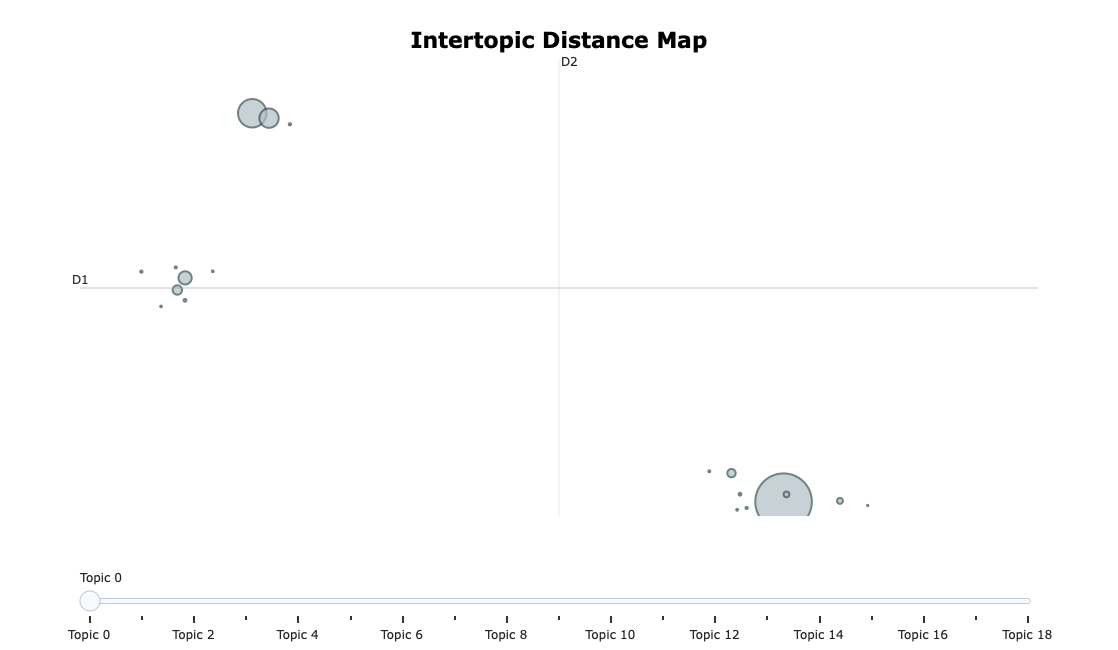

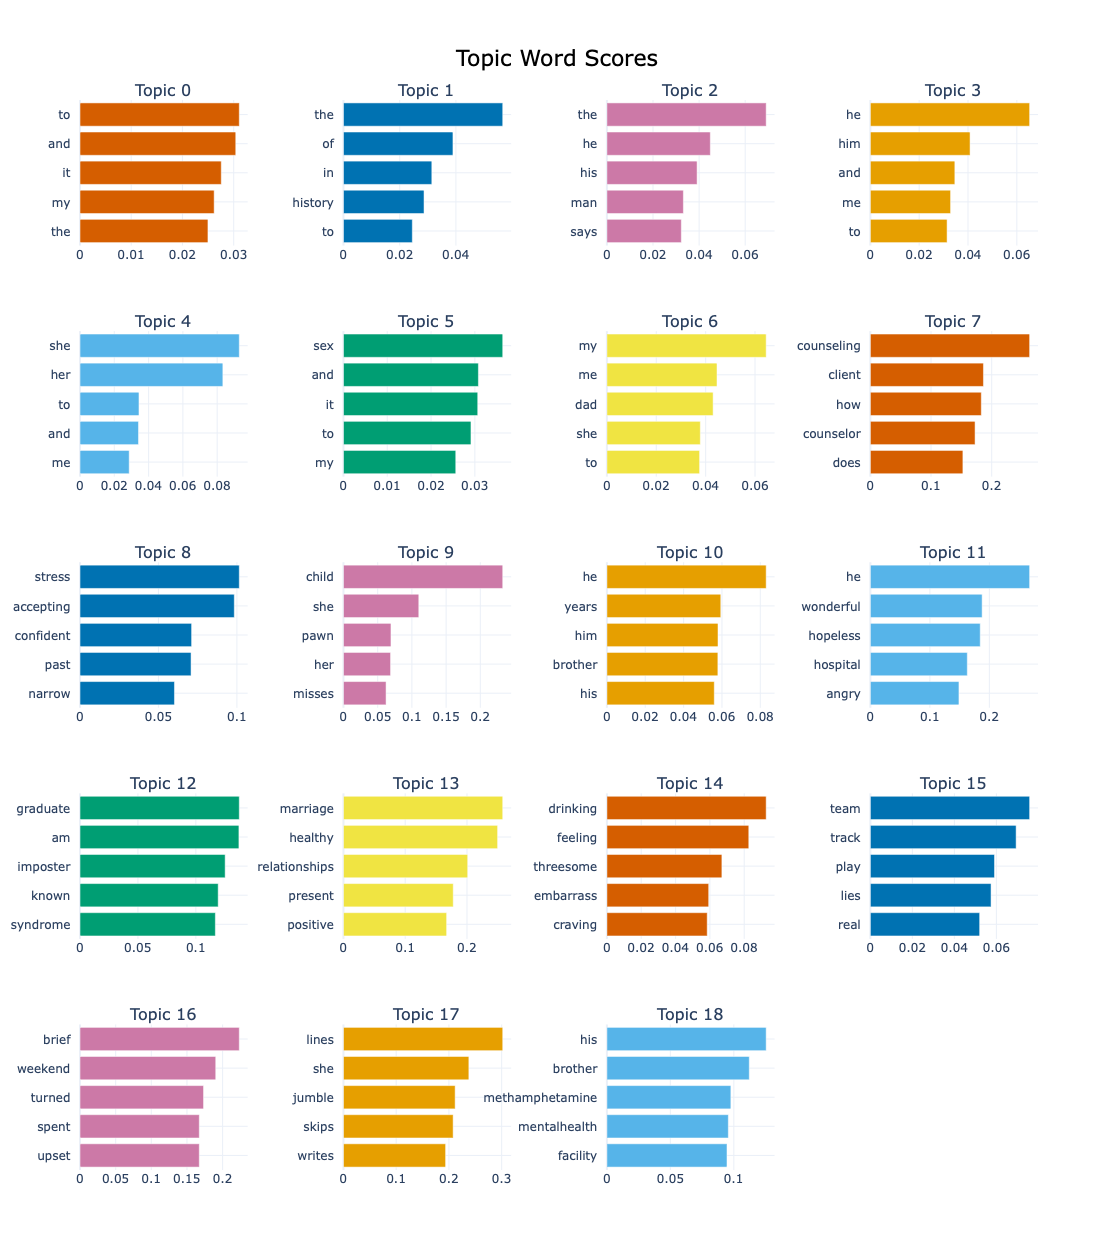

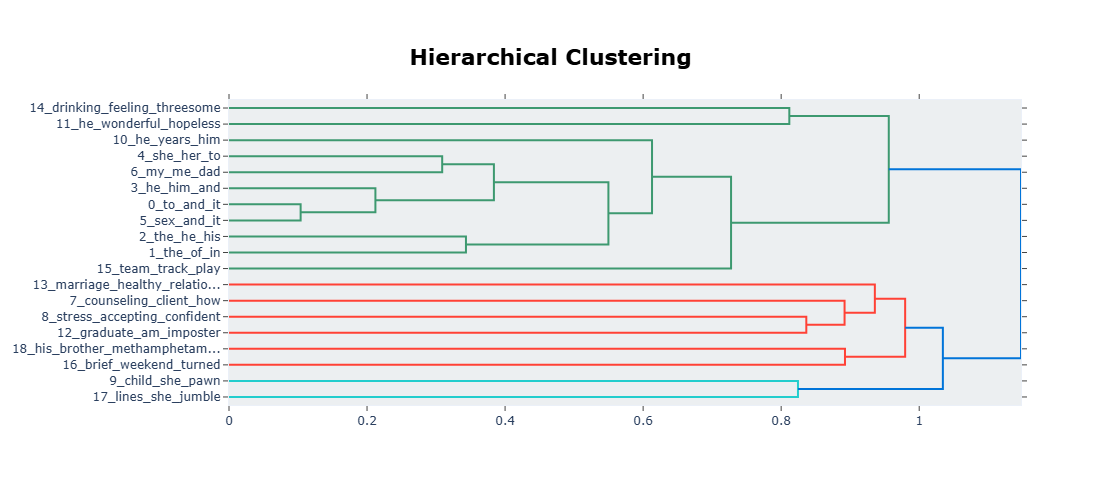

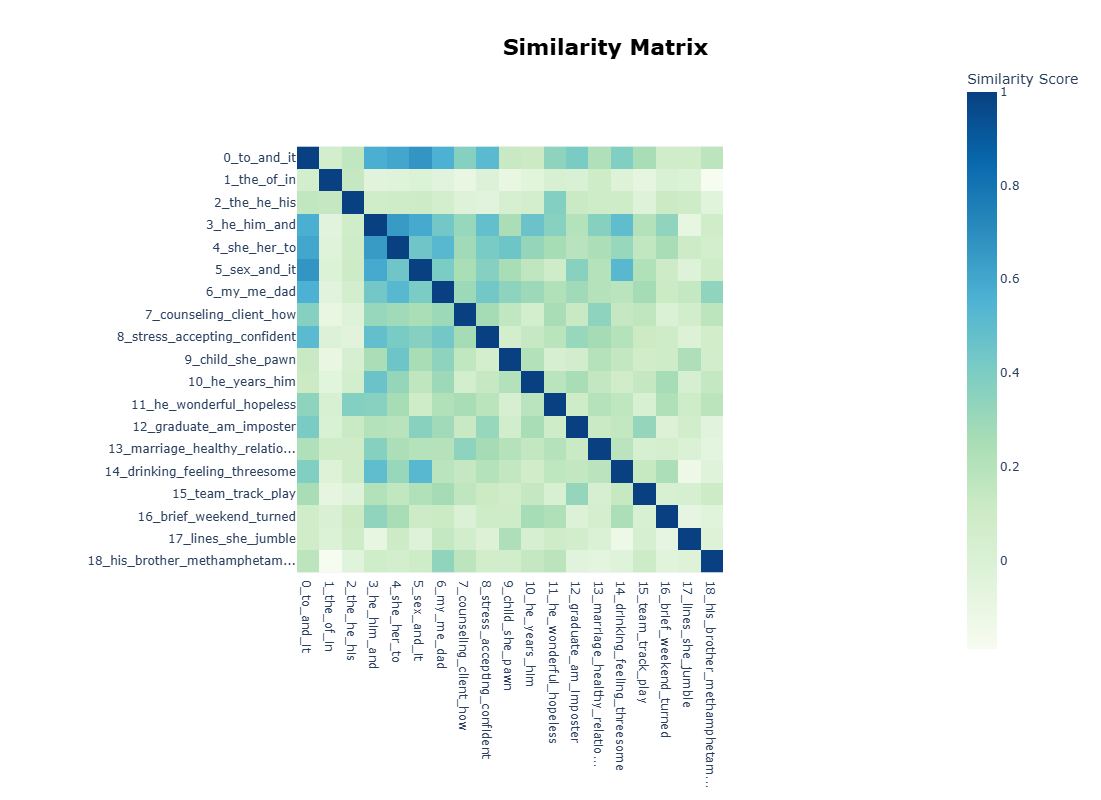

In [205]:
# -----------------------------
# 📊 BERTopic Visualizations (Reduced Model)
# -----------------------------

# Intertopic Distance Map
fig_topics = reduced_model.visualize_topics()
fig_topics.show()
fig_topics.write_html("bertopic_reduced_topics_map.html")

# Top Words per Topic (Bar chart)
fig_barchart = reduced_model.visualize_barchart(top_n_topics=20)
fig_barchart.show()
fig_barchart.write_html("bertopic_reduced_barchart.html")

# Topic Hierarchy
fig_hierarchy = reduced_model.visualize_hierarchy()
fig_hierarchy.show()
fig_hierarchy.write_html("bertopic_reduced_hierarchy.html")

# Heatmap of Topic Similarities
fig_heatmap = reduced_model.visualize_heatmap()
fig_heatmap.show()
fig_heatmap.write_html("bertopic_reduced_heatmap.html")



✅ Saved document-level topic assignments to document_topic_assignments.csv


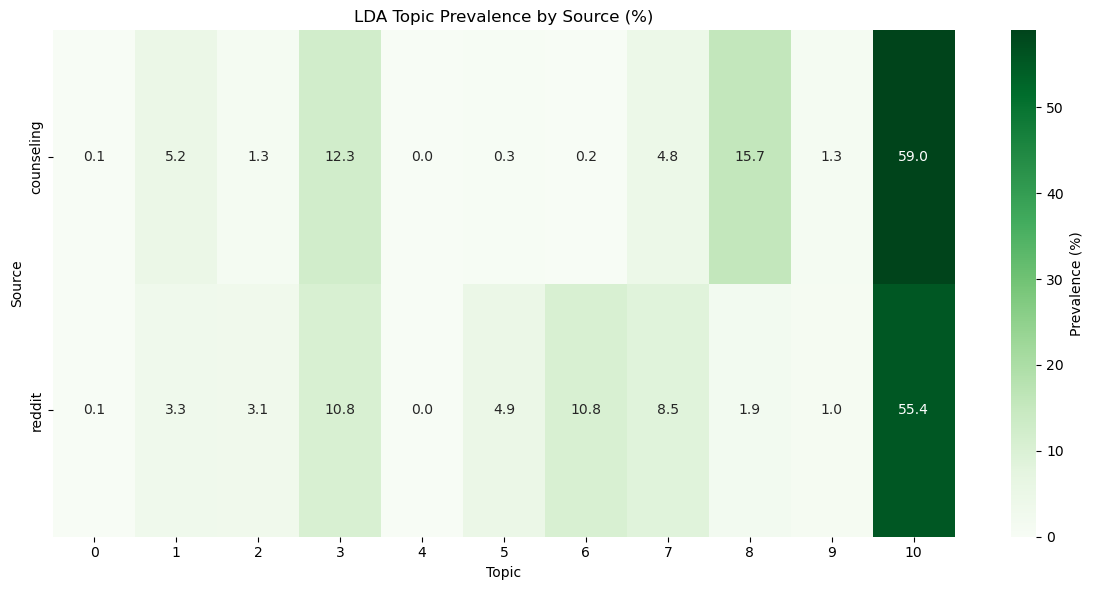

✅ Saved heatmap: lda_topic_prevalence_heatmap.png


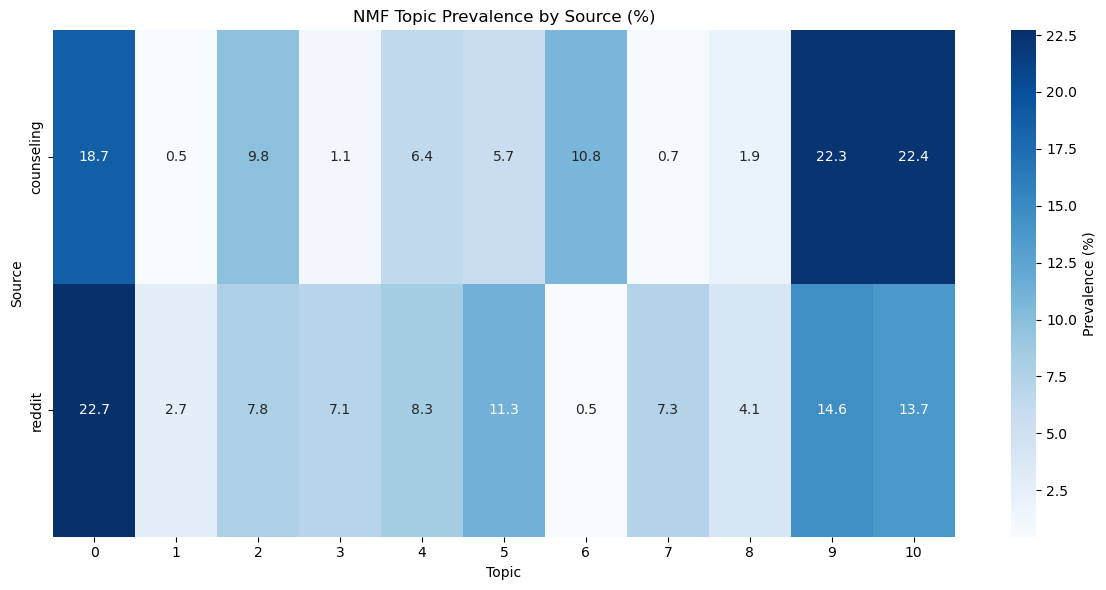

✅ Saved heatmap: nmf_topic_prevalence_heatmap.png


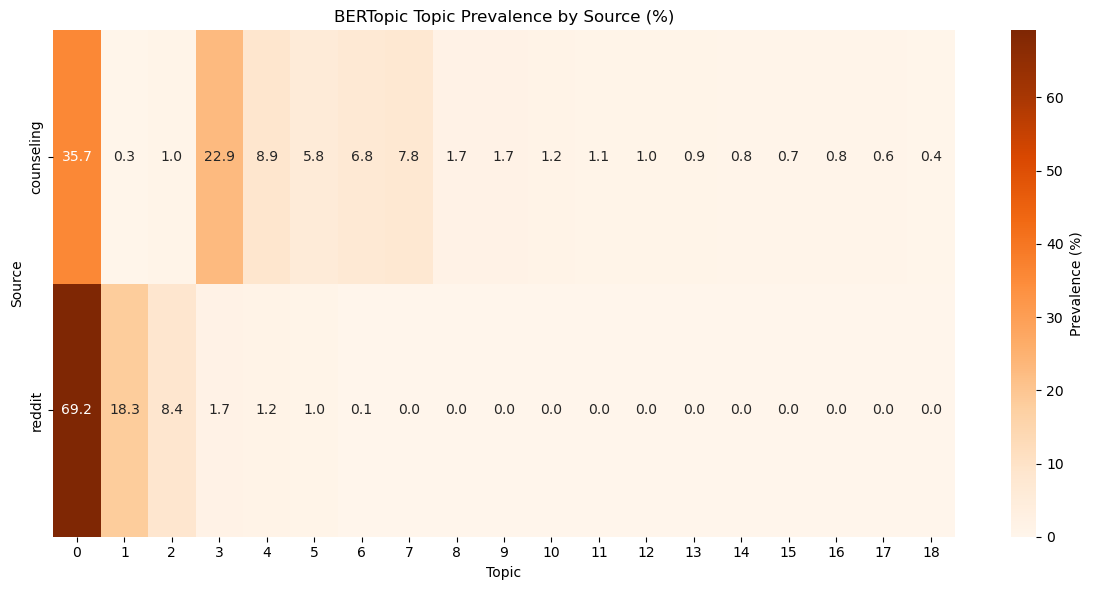

✅ Saved heatmap: bertopic_topic_prevalence_heatmap.png


In [209]:
# ============================
# Topic Assignments + Prevalence Heatmaps
# ============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Assuming you already have:
# - df_text (subset of dataset: reddit + counseling)
# - processed_texts (preprocessed tokens for LDA)
# - texts (raw text list for NMF/BERTopic)
# - lda_model, nmf_model, tfidf_vectorizer, bertopic_model
# - dictionary (for LDA)

# -----------------------------
# 1️⃣ Get topic assignments for each model
# -----------------------------

# LDA assignments (pick the topic with highest probability for each doc)
lda_doc_topics = [
    max(lda_model[dictionary.doc2bow(text)], key=lambda x: x[1])[0]
    for text in processed_texts
]

# NMF assignments
nmf_doc_matrix = nmf_model.transform(tfidf_vectorizer.transform(texts))
nmf_doc_topics = nmf_doc_matrix.argmax(axis=1)

# BERTopic assignments (skip outliers = -1 later)
bertopic_topics, _ = bertopic_model.transform(texts)

# -----------------------------
# 2️⃣ Add assignments to dataframe
# -----------------------------
df_text = df_text.copy()
df_text["lda_topic"] = lda_doc_topics
df_text["nmf_topic"] = nmf_doc_topics
df_text["bertopic_topic"] = bertopic_topics

# Save document-level assignments
df_text.to_csv("document_topic_assignments.csv", index=False)
print("✅ Saved document-level topic assignments to document_topic_assignments.csv")

# -----------------------------
# 3️⃣ Compute topic prevalence by source
# -----------------------------
lda_src_prev = df_text.groupby("source")["lda_topic"].value_counts(normalize=True).unstack(fill_value=0)
nmf_src_prev = df_text.groupby("source")["nmf_topic"].value_counts(normalize=True).unstack(fill_value=0)
bertopic_src_prev = df_text[df_text["bertopic_topic"] != -1] \
                        .groupby("source")["bertopic_topic"] \
                        .value_counts(normalize=True).unstack(fill_value=0)

# -----------------------------
# 4️⃣ Heatmap plotting function
# -----------------------------
def plot_heatmap(data, model_name, cmap, filename):
    plt.figure(figsize=(12,6))
    sns.heatmap(data*100, cmap=cmap, annot=True, fmt=".1f", cbar_kws={"label": "Prevalence (%)"})
    plt.title(f"{model_name} Topic Prevalence by Source (%)")
    plt.xlabel("Topic")
    plt.ylabel("Source")
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()
    print(f"✅ Saved heatmap: {filename}")

# -----------------------------
# 5️⃣ Generate heatmaps
# -----------------------------
plot_heatmap(lda_src_prev, "LDA", "Greens", "lda_topic_prevalence_heatmap.png")
plot_heatmap(nmf_src_prev, "NMF", "Blues", "nmf_topic_prevalence_heatmap.png")
plot_heatmap(bertopic_src_prev, "BERTopic", "Oranges", "bertopic_topic_prevalence_heatmap.png")


✅ BERTopic trained on 20k docs
✅ Topic table saved: bertopic_topics_20k.csv
✅ Saved topic prevalence to bertopic_prevalence_20k.csv


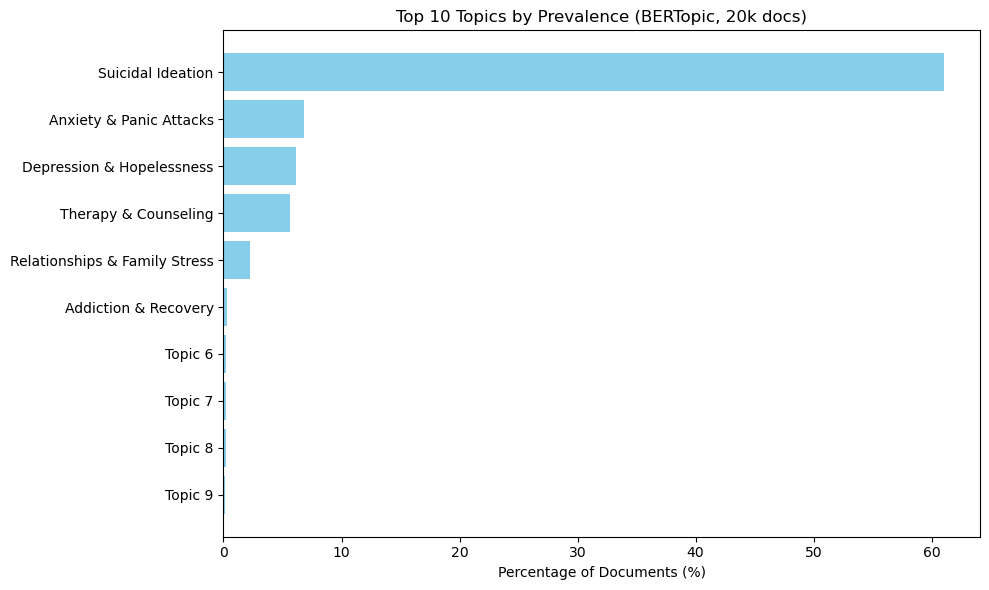

✅ Saved bar chart: bertopic_top_topics_bar.png


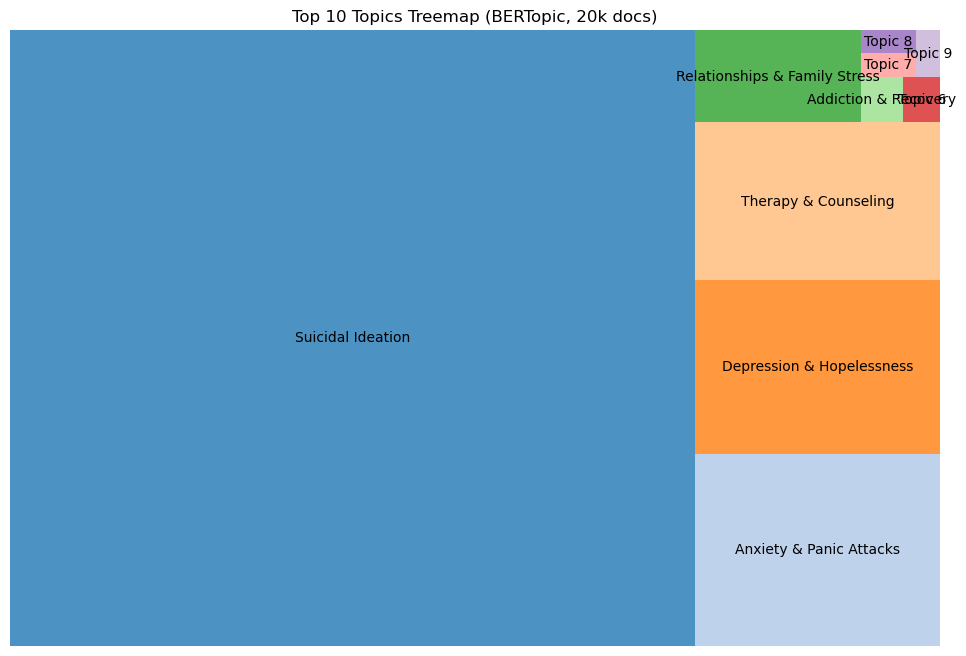

✅ Saved treemap: bertopic_top_topics_treemap.png
✅ Interactive visualizations saved as HTML files


In [211]:
# ============================
# BERTopic on 20k Docs + Outputs
# ============================

import pandas as pd
import matplotlib.pyplot as plt
import squarify  # for treemap
from bertopic import BERTopic

# -----------------------------
# 1. Sample 20k docs
# -----------------------------
df_sample = df.sample(20000, random_state=42)
train_texts = df_sample["text"].astype(str).tolist()

# -----------------------------
# 2. Train BERTopic
# -----------------------------
bertopic_model = BERTopic(language="english", calculate_probabilities=True)
topics_train, probs_train = bertopic_model.fit_transform(train_texts)

print("✅ BERTopic trained on 20k docs")

# -----------------------------
# 3. Build Example Docs + Labels Table
# -----------------------------
topic_words = bertopic_model.get_topics()
rep_docs = bertopic_model.get_representative_docs()

# Manual labels (EDIT after reviewing top words!)
topic_labels = {
    0: "Suicidal Ideation",
    1: "Anxiety & Panic Attacks",
    2: "Depression & Hopelessness",
    3: "Therapy & Counseling",
    4: "Relationships & Family Stress",
    5: "Addiction & Recovery"
}

records = []
for topic_id, words in topic_words.items():
    if topic_id == -1:   # skip outlier cluster
        continue
    top_words = ", ".join([w for w, _ in words[:10]])
    examples = " | ".join([d[:100] + "..." for d in rep_docs.get(topic_id, [])[:3]])
    label = topic_labels.get(topic_id, f"Topic {topic_id}")
    
    records.append({
        "Topic ID": topic_id,
        "Manual Label": label,
        "Top Words": top_words,
        "Example Docs": examples
    })

topic_table = pd.DataFrame(records)

pd.set_option("display.max_colwidth", 200)
topic_table.to_csv("bertopic_topics_20k.csv", index=False)
print("✅ Topic table saved: bertopic_topics_20k.csv")

# -----------------------------
# 4. Compute Document Prevalence
# -----------------------------
topic_counts = pd.Series(topics_train).value_counts(normalize=True) * 100
topic_prevalence = topic_counts.sort_index().to_dict()

topic_prevalence_df = pd.DataFrame({
    "Topic": list(topic_prevalence.keys()),
    "Prevalence (%)": list(topic_prevalence.values())
})
topic_prevalence_df.to_csv("bertopic_prevalence_20k.csv", index=False)
print("✅ Saved topic prevalence to bertopic_prevalence_20k.csv")

# -----------------------------
# 5. Visualization: Top Topics (Bar + Treemap)
# -----------------------------
topic_df = pd.DataFrame({
    "Topic": [t for t in topic_counts.index if t != -1],
    "Prevalence": [v for t, v in topic_counts.items() if t != -1]
}).sort_values("Prevalence", ascending=False)

top_n = 10
topic_df_top = topic_df.head(top_n)
topic_df_top["Label"] = topic_df_top["Topic"].map(lambda t: topic_labels.get(t, f"Topic {t}"))

# Bar chart
plt.figure(figsize=(10, 6))
plt.barh(topic_df_top["Label"], topic_df_top["Prevalence"], color="skyblue")
plt.xlabel("Percentage of Documents (%)")
plt.title(f"Top {top_n} Topics by Prevalence (BERTopic, 20k docs)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("bertopic_top_topics_bar.png", dpi=300, bbox_inches="tight")
plt.show()
print("✅ Saved bar chart: bertopic_top_topics_bar.png")

# Treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=topic_df_top["Prevalence"],
    label=topic_df_top["Label"],
    alpha=0.8,
    color=plt.cm.tab20.colors
)
plt.title(f"Top {top_n} Topics Treemap (BERTopic, 20k docs)")
plt.axis("off")
plt.savefig("bertopic_top_topics_treemap.png", dpi=300, bbox_inches="tight")
plt.show()
print("✅ Saved treemap: bertopic_top_topics_treemap.png")

# -----------------------------
# 6. Interactive Visualizations (HTML)
# -----------------------------
# Intertopic distance map
fig_topics = bertopic_model.visualize_topics()
fig_topics.write_html("bertopic_intertopic_map.html")

# Top words per topic
fig_barchart = bertopic_model.visualize_barchart(top_n_topics=10)
fig_barchart.write_html("bertopic_top_words_barchart.html")

# Hierarchy of topics
fig_hierarchy = bertopic_model.visualize_hierarchy()
fig_hierarchy.write_html("bertopic_hierarchy.html")

print("✅ Interactive visualizations saved as HTML files")


2025-09-30 23:41:35,838 - BERTopic - Embedding - Transforming documents to embeddings.


✅ Balanced dataset created
source
brfss         3512
counseling    3512
reddit        3512
Name: count, dtype: int64


Batches:   0%|          | 0/330 [00:00<?, ?it/s]

2025-09-30 23:41:59,678 - BERTopic - Embedding - Completed ✓
2025-09-30 23:41:59,678 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-09-30 23:42:02,973 - BERTopic - Dimensionality - Completed ✓
2025-09-30 23:42:02,974 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-09-30 23:42:16,199 - BERTopic - Cluster - Completed ✓
2025-09-30 23:42:16,209 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-09-30 23:42:16,512 - BERTopic - Representation - Completed ✓



📊 Embeddings - Logistic Regression
              precision    recall  f1-score   support

       brfss       1.00      1.00      1.00       702
  counseling       0.97      0.97      0.97       703
      reddit       0.97      0.97      0.97       703

    accuracy                           0.98      2108
   macro avg       0.98      0.98      0.98      2108
weighted avg       0.98      0.98      0.98      2108

ROC-AUC=0.428, PR-AUC=0.282

📊 Embeddings - Random Forest
              precision    recall  f1-score   support

       brfss       1.00      1.00      1.00       702
  counseling       1.00      0.97      0.98       703
      reddit       0.97      1.00      0.98       703

    accuracy                           0.99      2108
   macro avg       0.99      0.99      0.99      2108
weighted avg       0.99      0.99      0.99      2108

ROC-AUC=0.500, PR-AUC=0.311

📊 TopicProbs - Logistic Regression
              precision    recall  f1-score   support

       brfss       1.00  

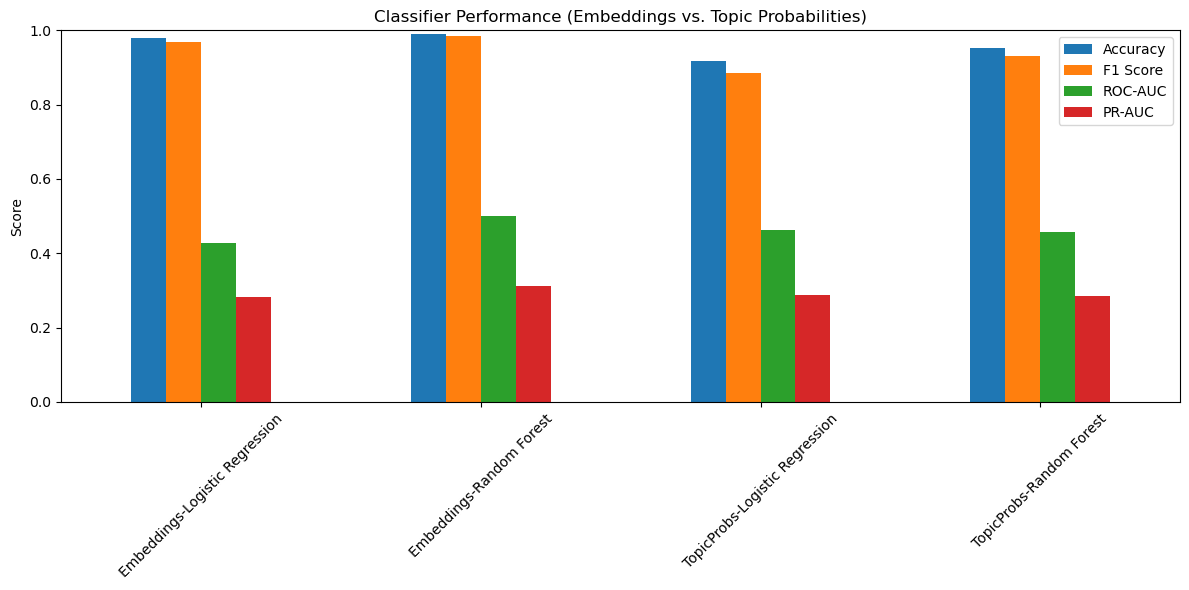

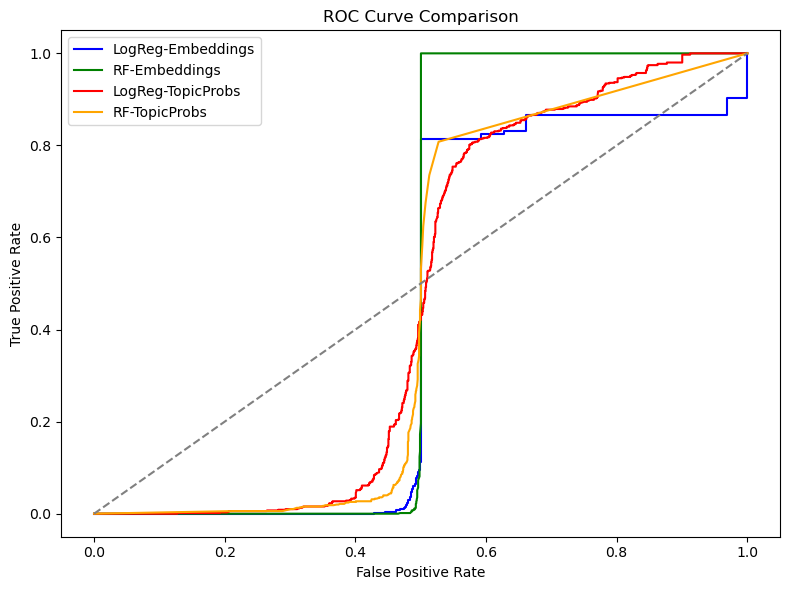

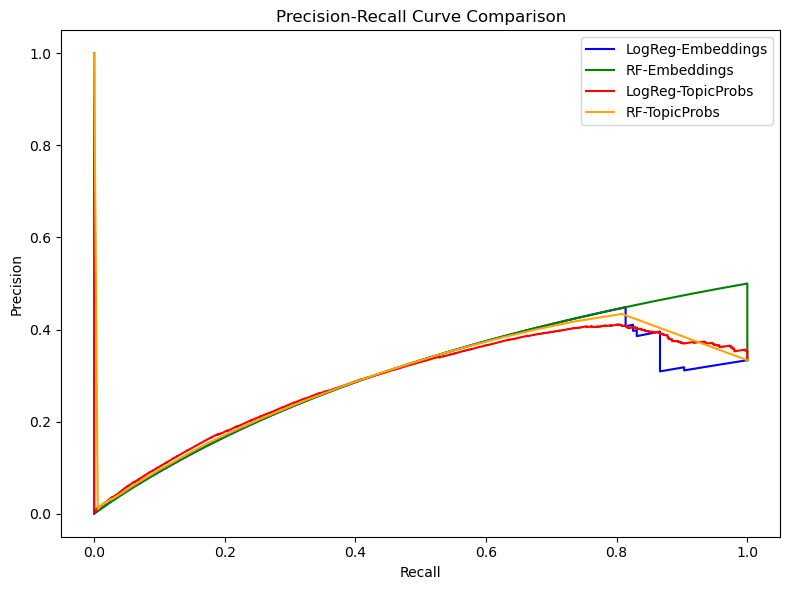

In [217]:
# ============================
# BERTopic Classification Pipeline (Improved)
# ============================

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, f1_score, roc_auc_score, roc_curve, auc,
    precision_recall_curve, average_precision_score
)

from bertopic import BERTopic

# -----------------------------
# 0. Reproducibility
# -----------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# -----------------------------
# 1. Balanced Sampling
# -----------------------------
min_class_size = df["source"].value_counts().min()
df_balanced = df.groupby("source").apply(
    lambda x: x.sample(min_class_size, random_state=SEED)
).reset_index(drop=True)

X_text = df_balanced["text"].astype(str).tolist()
y = df_balanced["source"]

print("✅ Balanced dataset created")
print(df_balanced["source"].value_counts())

# -----------------------------
# 2. Train BERTopic & Extract Features
# -----------------------------
bertopic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = bertopic_model.fit_transform(X_text)

# Features Option A: Dense embeddings
embeddings = bertopic_model.embedding_model.embed(X_text)

# Features Option B: Topic probability vectors
probs = np.nan_to_num(probs)  # replace NaNs if any

# -----------------------------
# 3. Train/Test Split
# -----------------------------
def prepare_train_test(features, labels, feature_name):
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=0.2, random_state=SEED, stratify=labels
    )
    return X_train, X_test, y_train, y_test

# Split for embeddings
X_train_emb, X_test_emb, y_train, y_test = prepare_train_test(embeddings, y, "embeddings")

# Split for topic probs
X_train_prob, X_test_prob, _, _ = prepare_train_test(probs, y, "probs")

# Binary labels for ROC/PR (1=reddit, 0=counseling)
y_test = pd.Series(y_test)
y_test_bin = y_test.apply(lambda x: 1 if x == "reddit" else 0)

# -----------------------------
# 4. Train Classifiers
# -----------------------------
def train_and_eval(X_train, X_test, y_train, y_test, y_test_bin, label):
    results = {}

    # Logistic Regression
    log_reg = LogisticRegression(max_iter=200, n_jobs=-1, class_weight="balanced")
    log_reg.fit(X_train, y_train)
    y_pred_lr = log_reg.predict(X_test)
    y_pred_lr_proba = log_reg.predict_proba(X_test)[:, 1]

    # Random Forest
    rf = RandomForestClassifier(
        n_estimators=200, random_state=SEED, n_jobs=-1, class_weight="balanced"
    )
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    y_pred_rf_proba = rf.predict_proba(X_test)[:, 1]

    # Store metrics
    for model_name, y_pred, y_proba in [
        ("Logistic Regression", y_pred_lr, y_pred_lr_proba),
        ("Random Forest", y_pred_rf, y_pred_rf_proba)
    ]:
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test_bin, pd.Series(y_pred).apply(lambda x: 1 if x == "reddit" else 0))
        roc = roc_auc_score(y_test_bin, y_proba)
        pr_auc = average_precision_score(y_test_bin, y_proba)

        results[f"{label}-{model_name}"] = {
            "Accuracy": acc,
            "F1 Score": f1,
            "ROC-AUC": roc,
            "PR-AUC": pr_auc
        }

        print(f"\n📊 {label} - {model_name}")
        print(classification_report(y_test, y_pred))
        print(f"ROC-AUC={roc:.3f}, PR-AUC={pr_auc:.3f}")

    return results

# Train/evaluate on embeddings
results_emb = train_and_eval(X_train_emb, X_test_emb, y_train, y_test, y_test_bin, "Embeddings")

# Train/evaluate on topic probabilities
results_prob = train_and_eval(X_train_prob, X_test_prob, y_train, y_test, y_test_bin, "TopicProbs")

# -----------------------------
# 5. Collect Results
# -----------------------------
metrics_df = pd.DataFrame(results_emb | results_prob).T
metrics_df.to_csv("bertopic_classification_metrics.csv")
print("\n✅ Metrics saved to bertopic_classification_metrics.csv")

# -----------------------------
# 6. Visualize Comparison
# -----------------------------
metrics_df.plot(kind="bar", figsize=(12,6), rot=45)
plt.title("Classifier Performance (Embeddings vs. Topic Probabilities)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("bertopic_classifier_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# -----------------------------
# 7. ROC Curve Comparison
# -----------------------------
plt.figure(figsize=(8,6))

# Logistic Regression - Embeddings
fpr, tpr, _ = roc_curve(y_test_bin, LogisticRegression(max_iter=200, n_jobs=-1, class_weight="balanced")
                         .fit(X_train_emb, y_train).predict_proba(X_test_emb)[:,1])
plt.plot(fpr, tpr, label="LogReg-Embeddings", color="blue")

# Random Forest - Embeddings
fpr, tpr, _ = roc_curve(y_test_bin, RandomForestClassifier(n_estimators=200, random_state=SEED, 
                         n_jobs=-1, class_weight="balanced").fit(X_train_emb, y_train).predict_proba(X_test_emb)[:,1])
plt.plot(fpr, tpr, label="RF-Embeddings", color="green")

# Logistic Regression - TopicProbs
fpr, tpr, _ = roc_curve(y_test_bin, LogisticRegression(max_iter=200, n_jobs=-1, class_weight="balanced")
                         .fit(X_train_prob, y_train).predict_proba(X_test_prob)[:,1])
plt.plot(fpr, tpr, label="LogReg-TopicProbs", color="red")

# Random Forest - TopicProbs
fpr, tpr, _ = roc_curve(y_test_bin, RandomForestClassifier(n_estimators=200, random_state=SEED, 
                         n_jobs=-1, class_weight="balanced").fit(X_train_prob, y_train).predict_proba(X_test_prob)[:,1])
plt.plot(fpr, tpr, label="RF-TopicProbs", color="orange")

plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.savefig("roc_curve_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# -----------------------------
# 8. Precision-Recall Curve Comparison
# -----------------------------
plt.figure(figsize=(8,6))

# Logistic Regression - Embeddings
precision, recall, _ = precision_recall_curve(y_test_bin, LogisticRegression(max_iter=200, n_jobs=-1, class_weight="balanced")
                                              .fit(X_train_emb, y_train).predict_proba(X_test_emb)[:,1])
plt.plot(recall, precision, label="LogReg-Embeddings", color="blue")

# Random Forest - Embeddings
precision, recall, _ = precision_recall_curve(y_test_bin, RandomForestClassifier(n_estimators=200, random_state=SEED, 
                                              n_jobs=-1, class_weight="balanced").fit(X_train_emb, y_train).predict_proba(X_test_emb)[:,1])
plt.plot(recall, precision, label="RF-Embeddings", color="green")

# Logistic Regression - TopicProbs
precision, recall, _ = precision_recall_curve(y_test_bin, LogisticRegression(max_iter=200, n_jobs=-1, class_weight="balanced")
                                              .fit(X_train_prob, y_train).predict_proba(X_test_prob)[:,1])
plt.plot(recall, precision, label="LogReg-TopicProbs", color="red")

# Random Forest - TopicProbs
precision, recall, _ = precision_recall_curve(y_test_bin, RandomForestClassifier(n_estimators=200, random_state=SEED, 
                                              n_jobs=-1, class_weight="balanced").fit(X_train_prob, y_train).predict_proba(X_test_prob)[:,1])
plt.plot(recall, precision, label="RF-TopicProbs", color="orange")

plt.title("Precision-Recall Curve Comparison")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.tight_layout()
plt.savefig("pr_curve_comparison.png", dpi=300, bbox_inches="tight")
plt.show()



In [219]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download("vader_lexicon")

# ✅ Assuming df has a "text" column and "date" column
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores
df["sentiment"] = df["text"].astype(str).apply(lambda x: sia.polarity_scores(x)["compound"])

# Categorize into Positive / Negative / Neutral
def label_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment_label"] = df["sentiment"].apply(label_sentiment)

print(df[["text", "sentiment", "sentiment_label"]].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kottemadhusaiteja/nltk_data...


                                                                                                                                                                                                      text  \
0  Fantasizing about your FP: Do you do it? What do you fantasize about? : Who is your FP? Are you attracted to your FP in a romantic way? Do you fantasize about them? What are the fantasies like? \n...   
1  THIS IS A SUPPORT SUBREDDIT FOR PEOPLE WITH A MENTAL ILLNESS. : It's not for posting how infuriating the uneven floor tiles are, or how satisfying the candy sorted by color is.  Those have nothing...   
2  scared of my psychotic symptoms : I'm trying to keep reminding myself that what I'm thinking/ believing isn't real,  just symptoms to be managed.  But im scared.  Either im really about to be cont...   
3  Does anxiety make you unsure if you're sick or not? : It feels as though everything is coming down on me at once. I graduated college, which means I'm officaily an "adult" -

In [223]:
print(df.columns)


Index(['timestamp', 'source', 'text', 'label', 'geo', 'sentiment', 'year',
       'label_grouped', 'sentiment_label'],
      dtype='object')


In [225]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")


In [229]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
print(df["timestamp"].head())
print(df["timestamp"].dtype)


0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: timestamp, dtype: datetime64[ns]
datetime64[ns]


In [231]:
print(df["timestamp"].head(10))


0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
5   NaT
6   NaT
7   NaT
8   NaT
9   NaT
Name: timestamp, dtype: datetime64[ns]


In [235]:
import pandas as pd

# reload dataset fresh
df = pd.read_csv("/Users/kottemadhusaiteja/Desktop/harmonized_grouped.csv")

# check the raw values and type
print(df["timestamp"].head(20))
print(df["timestamp"].dtype)



0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: timestamp, dtype: float64
float64


In [237]:
df["date"] = pd.to_datetime(df["year"].astype(str) + "-01-01", errors="coerce")


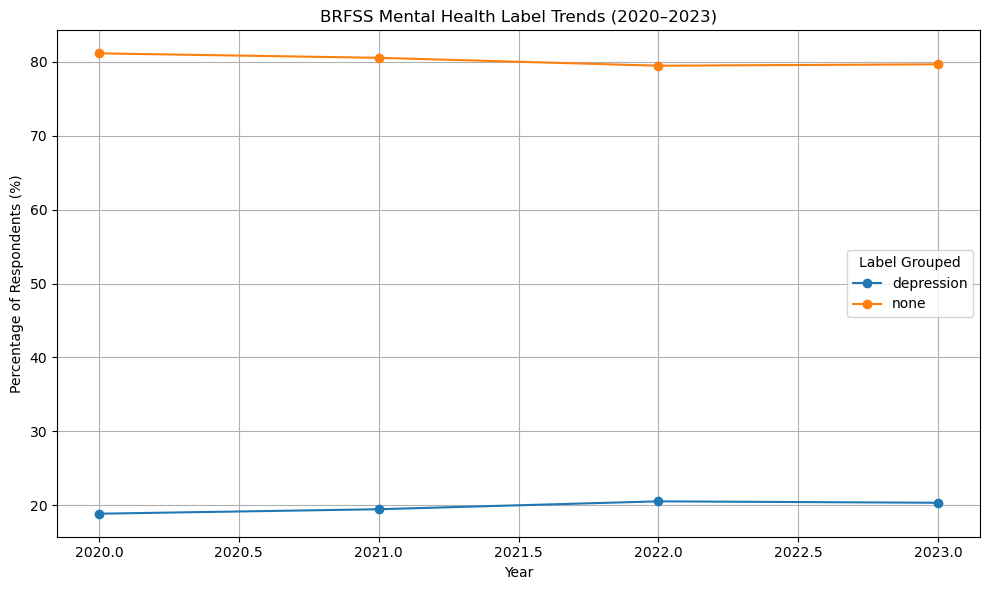

In [245]:
# Sentiment distribution by year (BRFSS only)
brfss_trends = (
    df_brfss_h.groupby(["year", "label_grouped"])
    .size()
    .unstack(fill_value=0)
)

# Normalize to percentages
brfss_trends_pct = brfss_trends.div(brfss_trends.sum(axis=1), axis=0) * 100

# Plot
import matplotlib.pyplot as plt
brfss_trends_pct.plot(marker="o", figsize=(10,6))
plt.title("BRFSS Mental Health Label Trends (2020–2023)")
plt.xlabel("Year")
plt.ylabel("Percentage of Respondents (%)")
plt.legend(title="Label Grouped")
plt.grid(True)
plt.tight_layout()
plt.show()
